In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
def find(txt, tar):
    idx = txt.find(tar)
    rtxt = txt[idx + len(tar):]
    return float(rtxt.split(', ')[0])

def find_data_name(txt, tar):
    idx = txt.find(tar)
    rtxt = txt[idx + len(tar):]
    txts = rtxt.split('/')
    for t in txts:
        if 'hard' in t or 'mid' in t or 'simple' in t:
            return t
    return ''

In [92]:
def get_res(log_file):
    losses = []
    rvalues = []
    rrmses = []
    tlosses = []
    dataset = ''
    with open(log_file, 'r') as f:
        lines = f.readlines()
        print(len(lines))
        for line in lines:
            if 'validation' in line:
                tar = 'loss = '
                loss = find(line, tar)
                tar = 'rvalue = '
                rvalue = find(line, tar)
                tar = 'rrmse = '
                rrmse = find(line, tar)

                losses.append(loss)
                rvalues.append(rvalue)
                rrmses.append(rrmse)
            elif 'epoch' in line and 'lr' in line and 'ckpt' not in line:
                tar = 'loss = '
                loss = find(line, tar)
                tlosses.append(loss)
            if 'Create dataset to following files' in line:
                tar = 'first = '
                dataset = find_data_name(line, tar)

    losses = np.array(losses)
    rvalues = np.array(rvalues)
    rrmses = np.array(rrmses)
    tlosses = np.array(tlosses)
    print('dataset = ', dataset)
    return losses, rvalues, rrmses, tlosses

8402
dataset =  simple
at epoch 10, loss = 0.8162, rvalue = 0.7196, rrmse = 2.6703


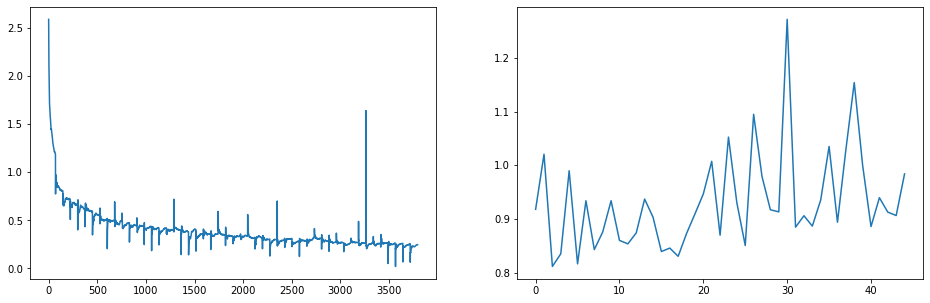

In [119]:
# simple
log_file = '../deep_emb_01.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

6723
dataset =  simple
at epoch 4, loss = 0.8029, rvalue = 0.7179, rrmse = 2.7345


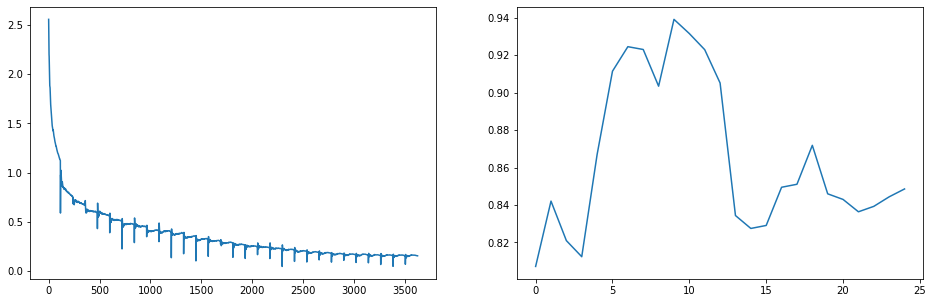

In [121]:
log_file = '../deep_emb_02.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

48063
dataset =  hard02
at epoch 30, valloss = 0.8908, rvalue = 0.6552, rrmse = 3.0436


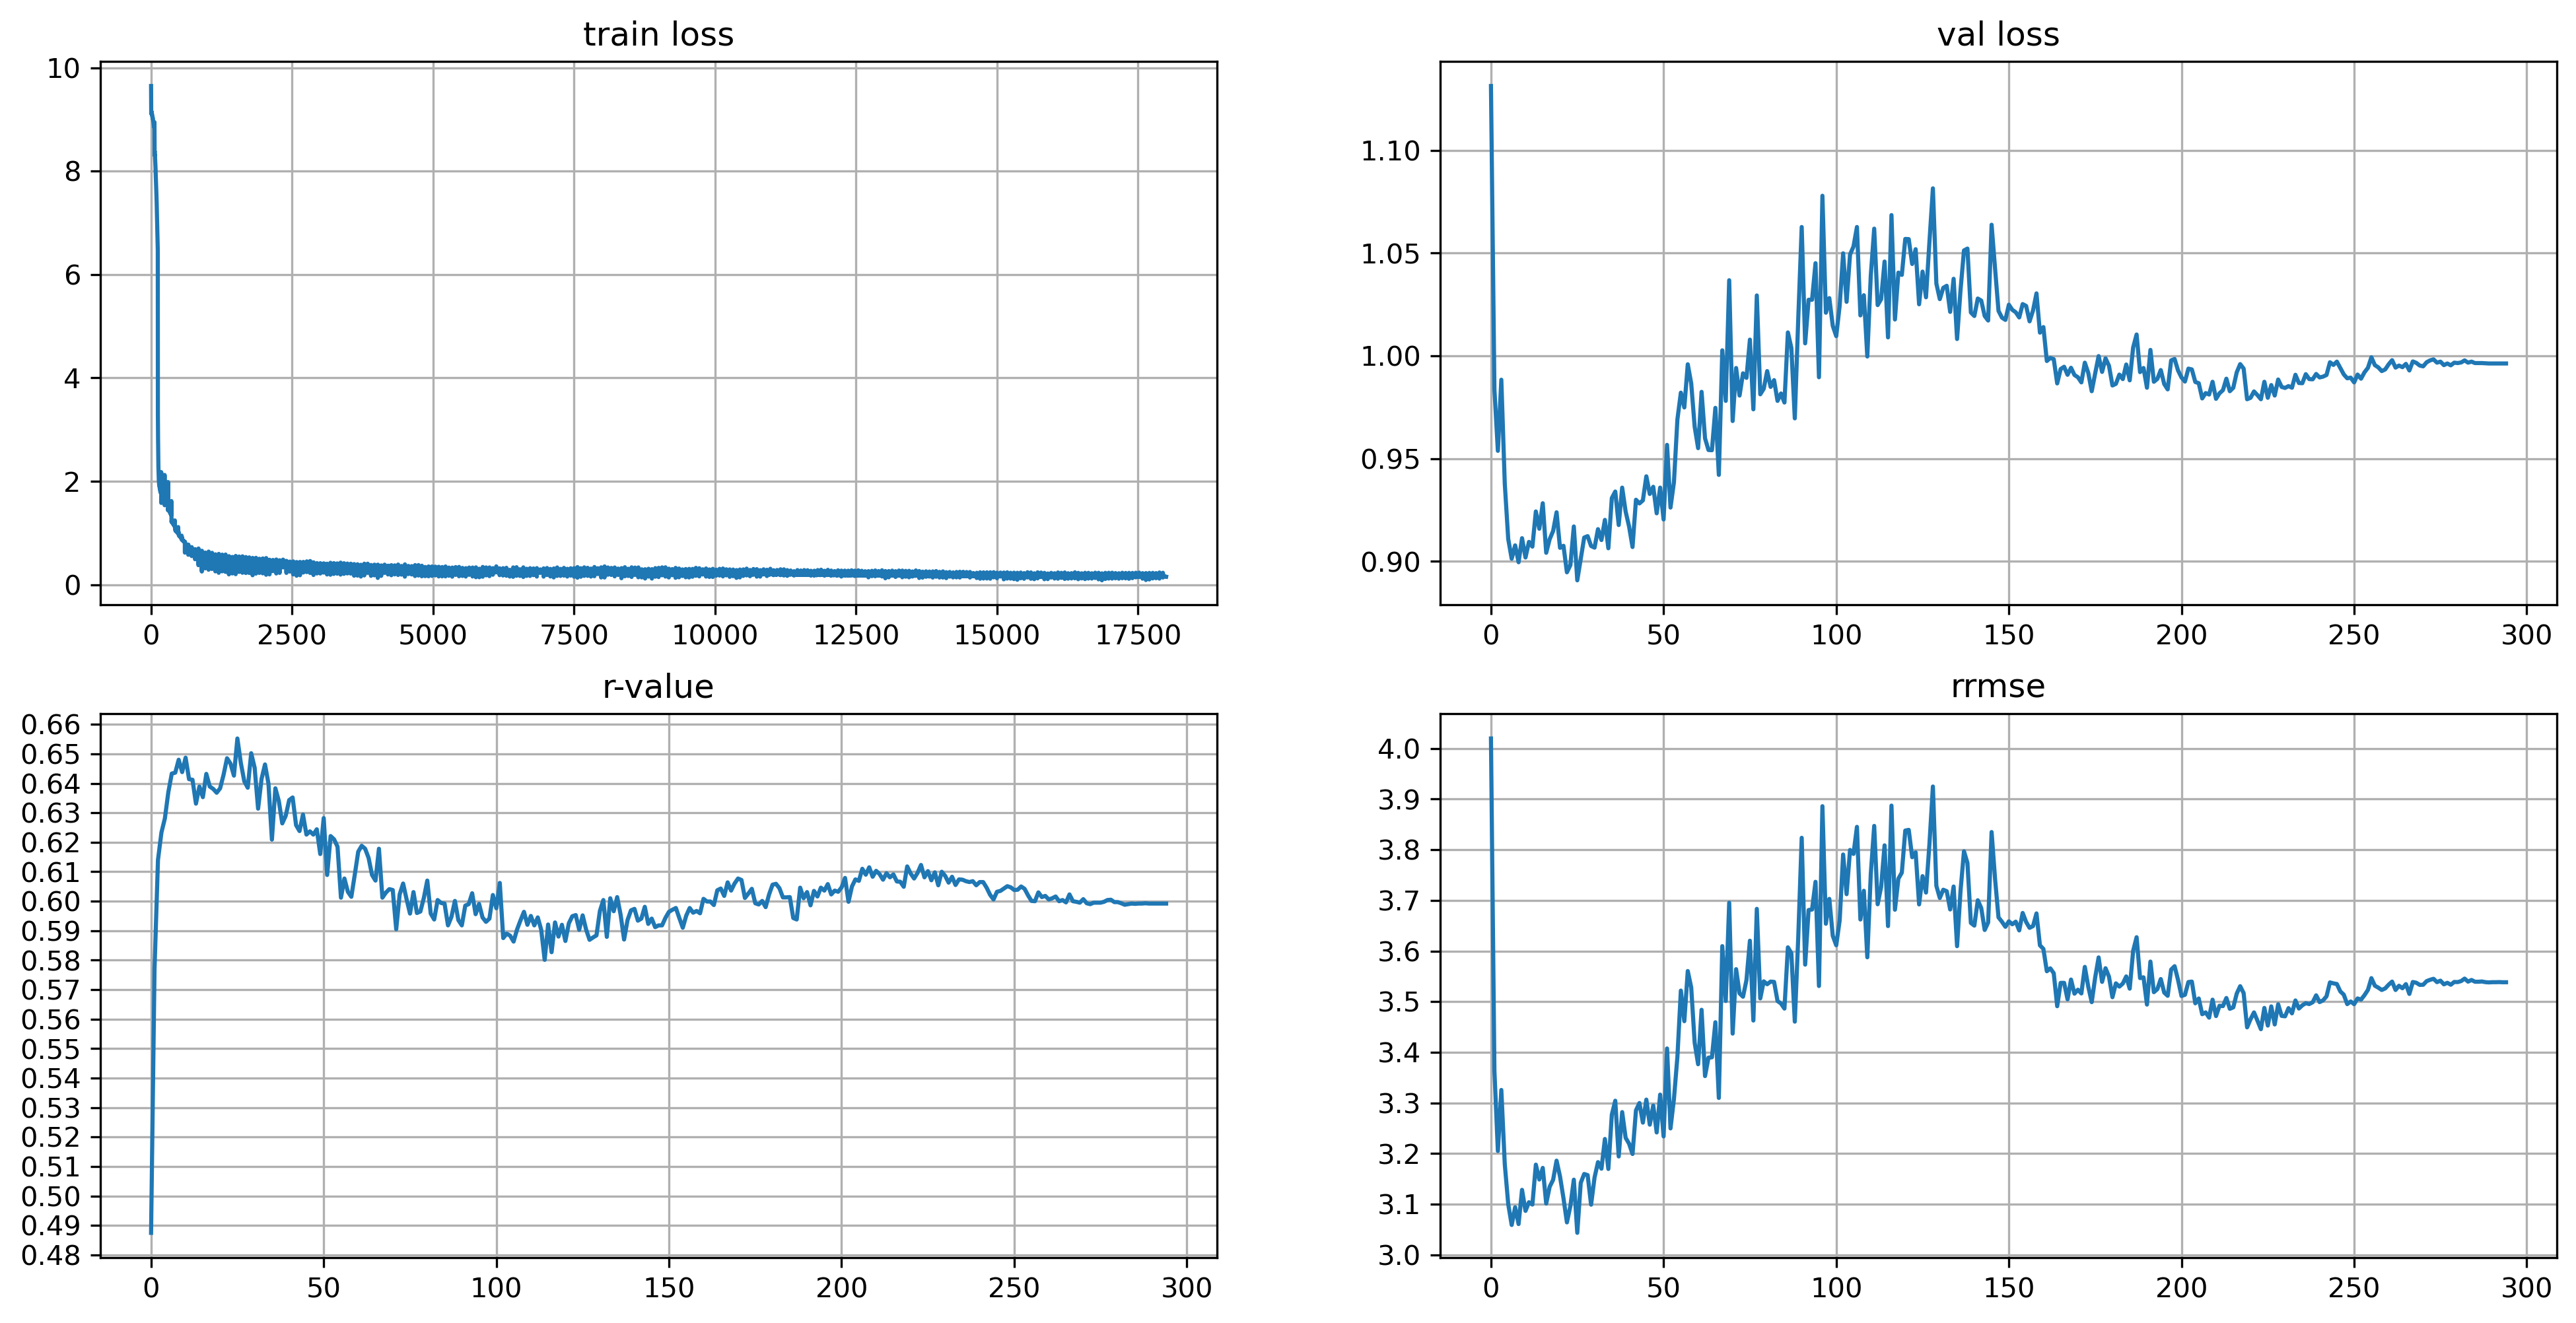

In [103]:
log_file = '../deep_emb_05.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

54057
dataset =  hard02
at epoch 211, loss = 0.9814, rvalue = 0.5927, rrmse = 3.3819


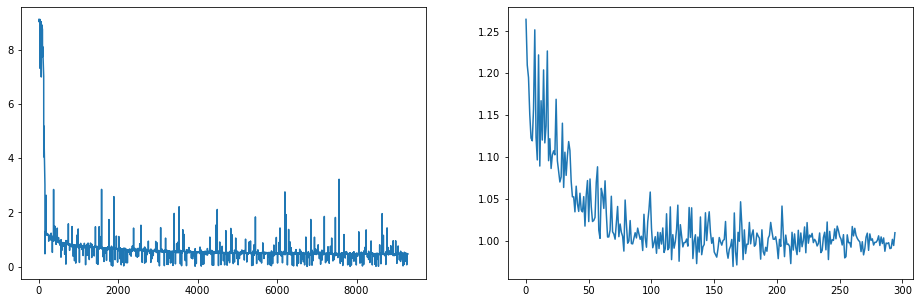

In [124]:
# lr = 1e-5, bert mask, fc head
log_file = '../new_model_05.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

24621
dataset =  hard02
at epoch 33, loss = 0.9888, rvalue = 0.5968, rrmse = 3.3476


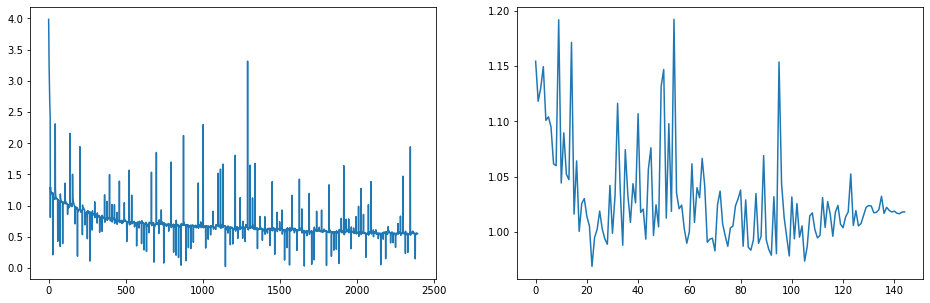

In [125]:
# lr = 5e-4, freeze=2
log_file = '../new_model_06.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

50170
dataset =  hard02
at epoch 222, loss = 1.1059, rvalue = 0.4972, rrmse = 3.8899


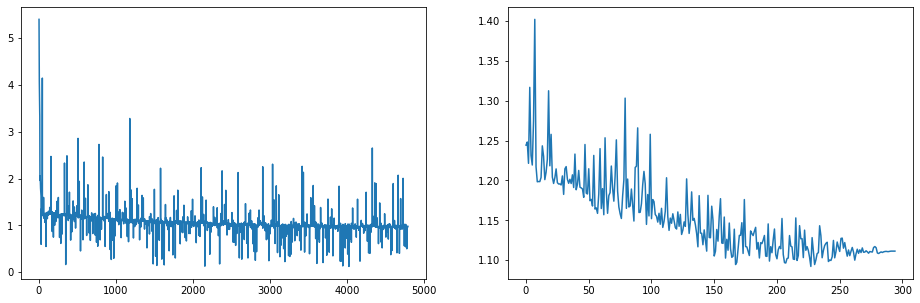

In [126]:
# lr = 5e-5, freeze=3
log_file = '../new_model_07.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

54167
dataset =  hard02
at epoch 130, loss = 0.9218, rvalue = 0.6068, rrmse = 3.172


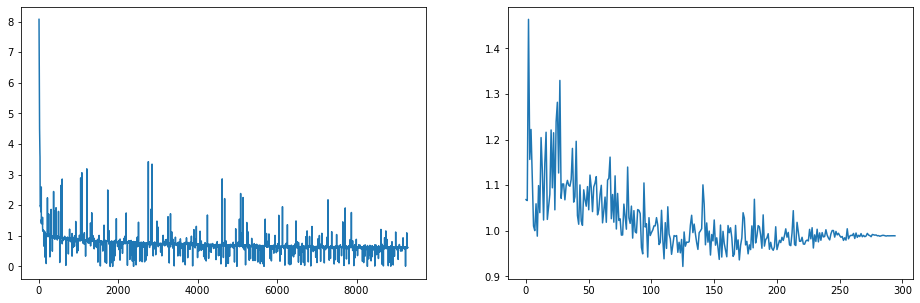

In [4]:
log_file = '../new_model_08.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[warm_up:])

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.show()

60680
dataset =  hard02
at epoch 237, loss = 0.859, rvalue = 0.6711, rrmse = 3.0079


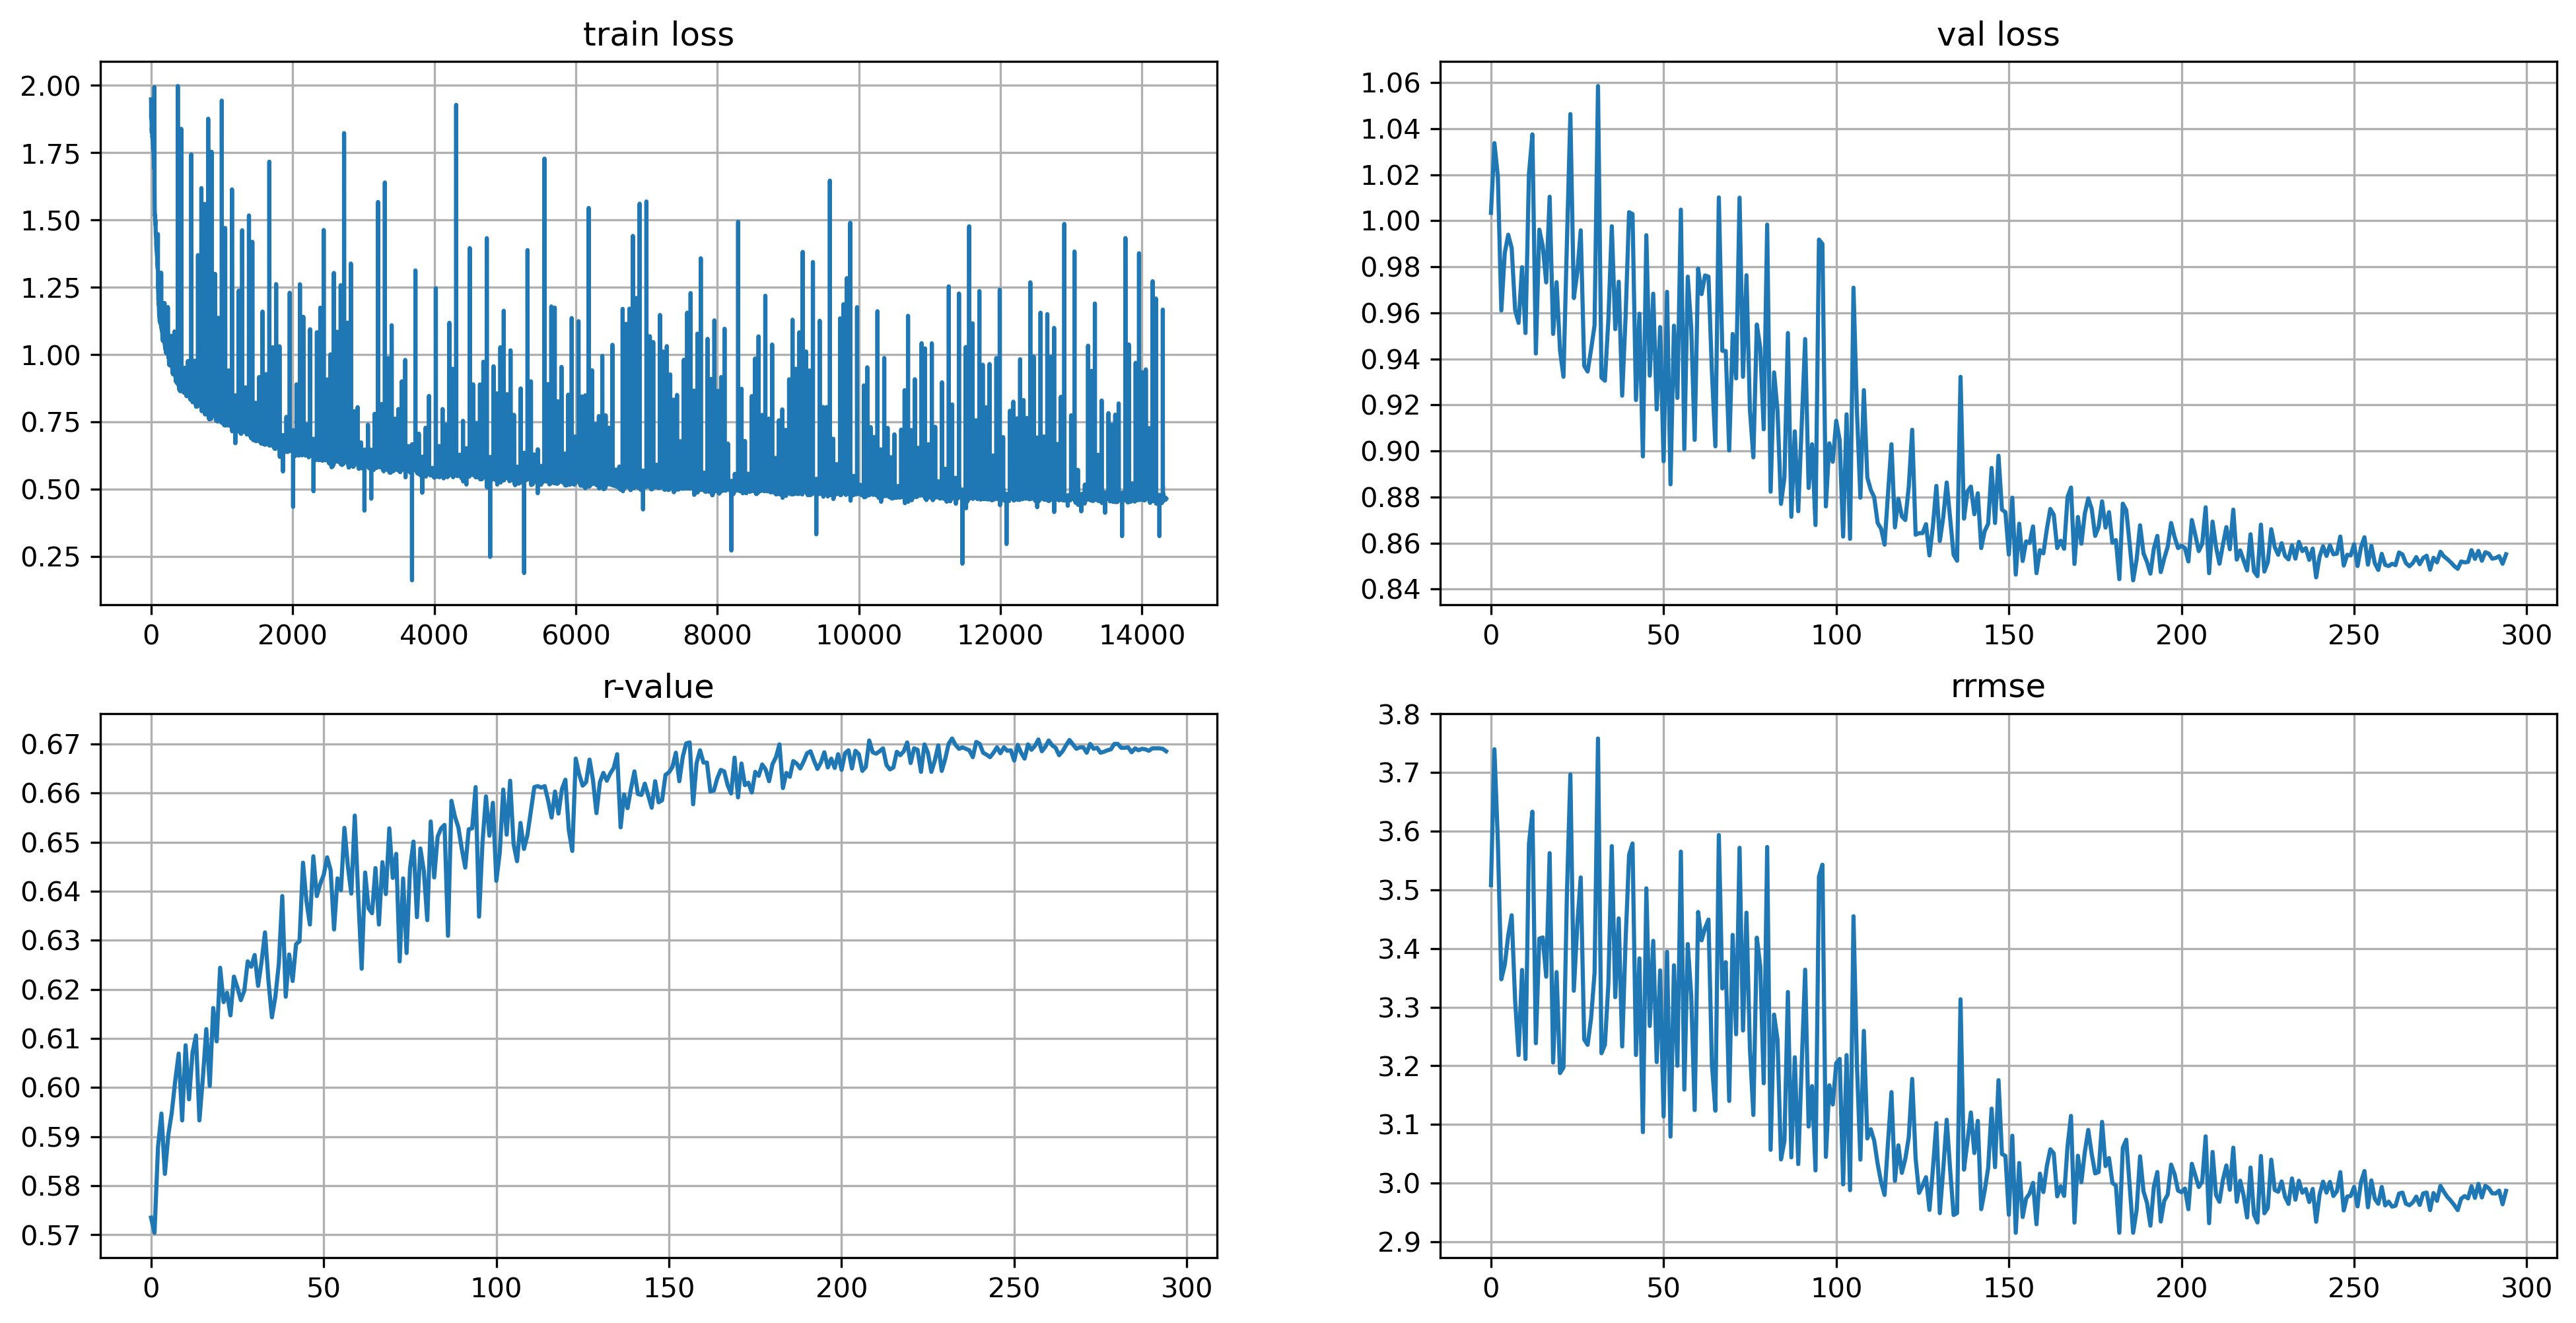

In [58]:
log_file = '../new_model_09.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02))

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

63951
dataset =  hard01
at epoch 2, loss = 1.4126, rvalue = 0.3189, rrmse = 5.8679


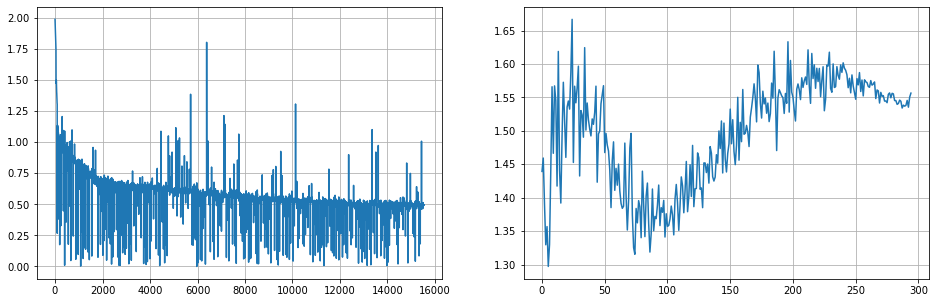

In [15]:
log_file = '../new_model_10.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[indices])
plt.grid()

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.grid()
plt.show()

66108
dataset =  hard01
at epoch 5, loss = 1.3869, rvalue = 0.2695, rrmse = 5.695


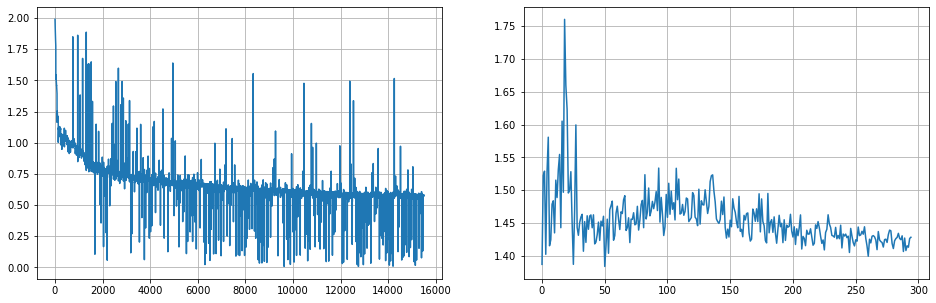

In [18]:
log_file = '../new_model_11.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(tlosses[indices])
plt.grid()

plt.figure(1, figsize=(16,5))
plt.subplot(1,2,2)
plt.plot(losses[warm_up:])
plt.grid()
plt.show()

76808
dataset =  hard02
at epoch 51, loss = 0.8517, rvalue = 0.6657, rrmse = 2.8475


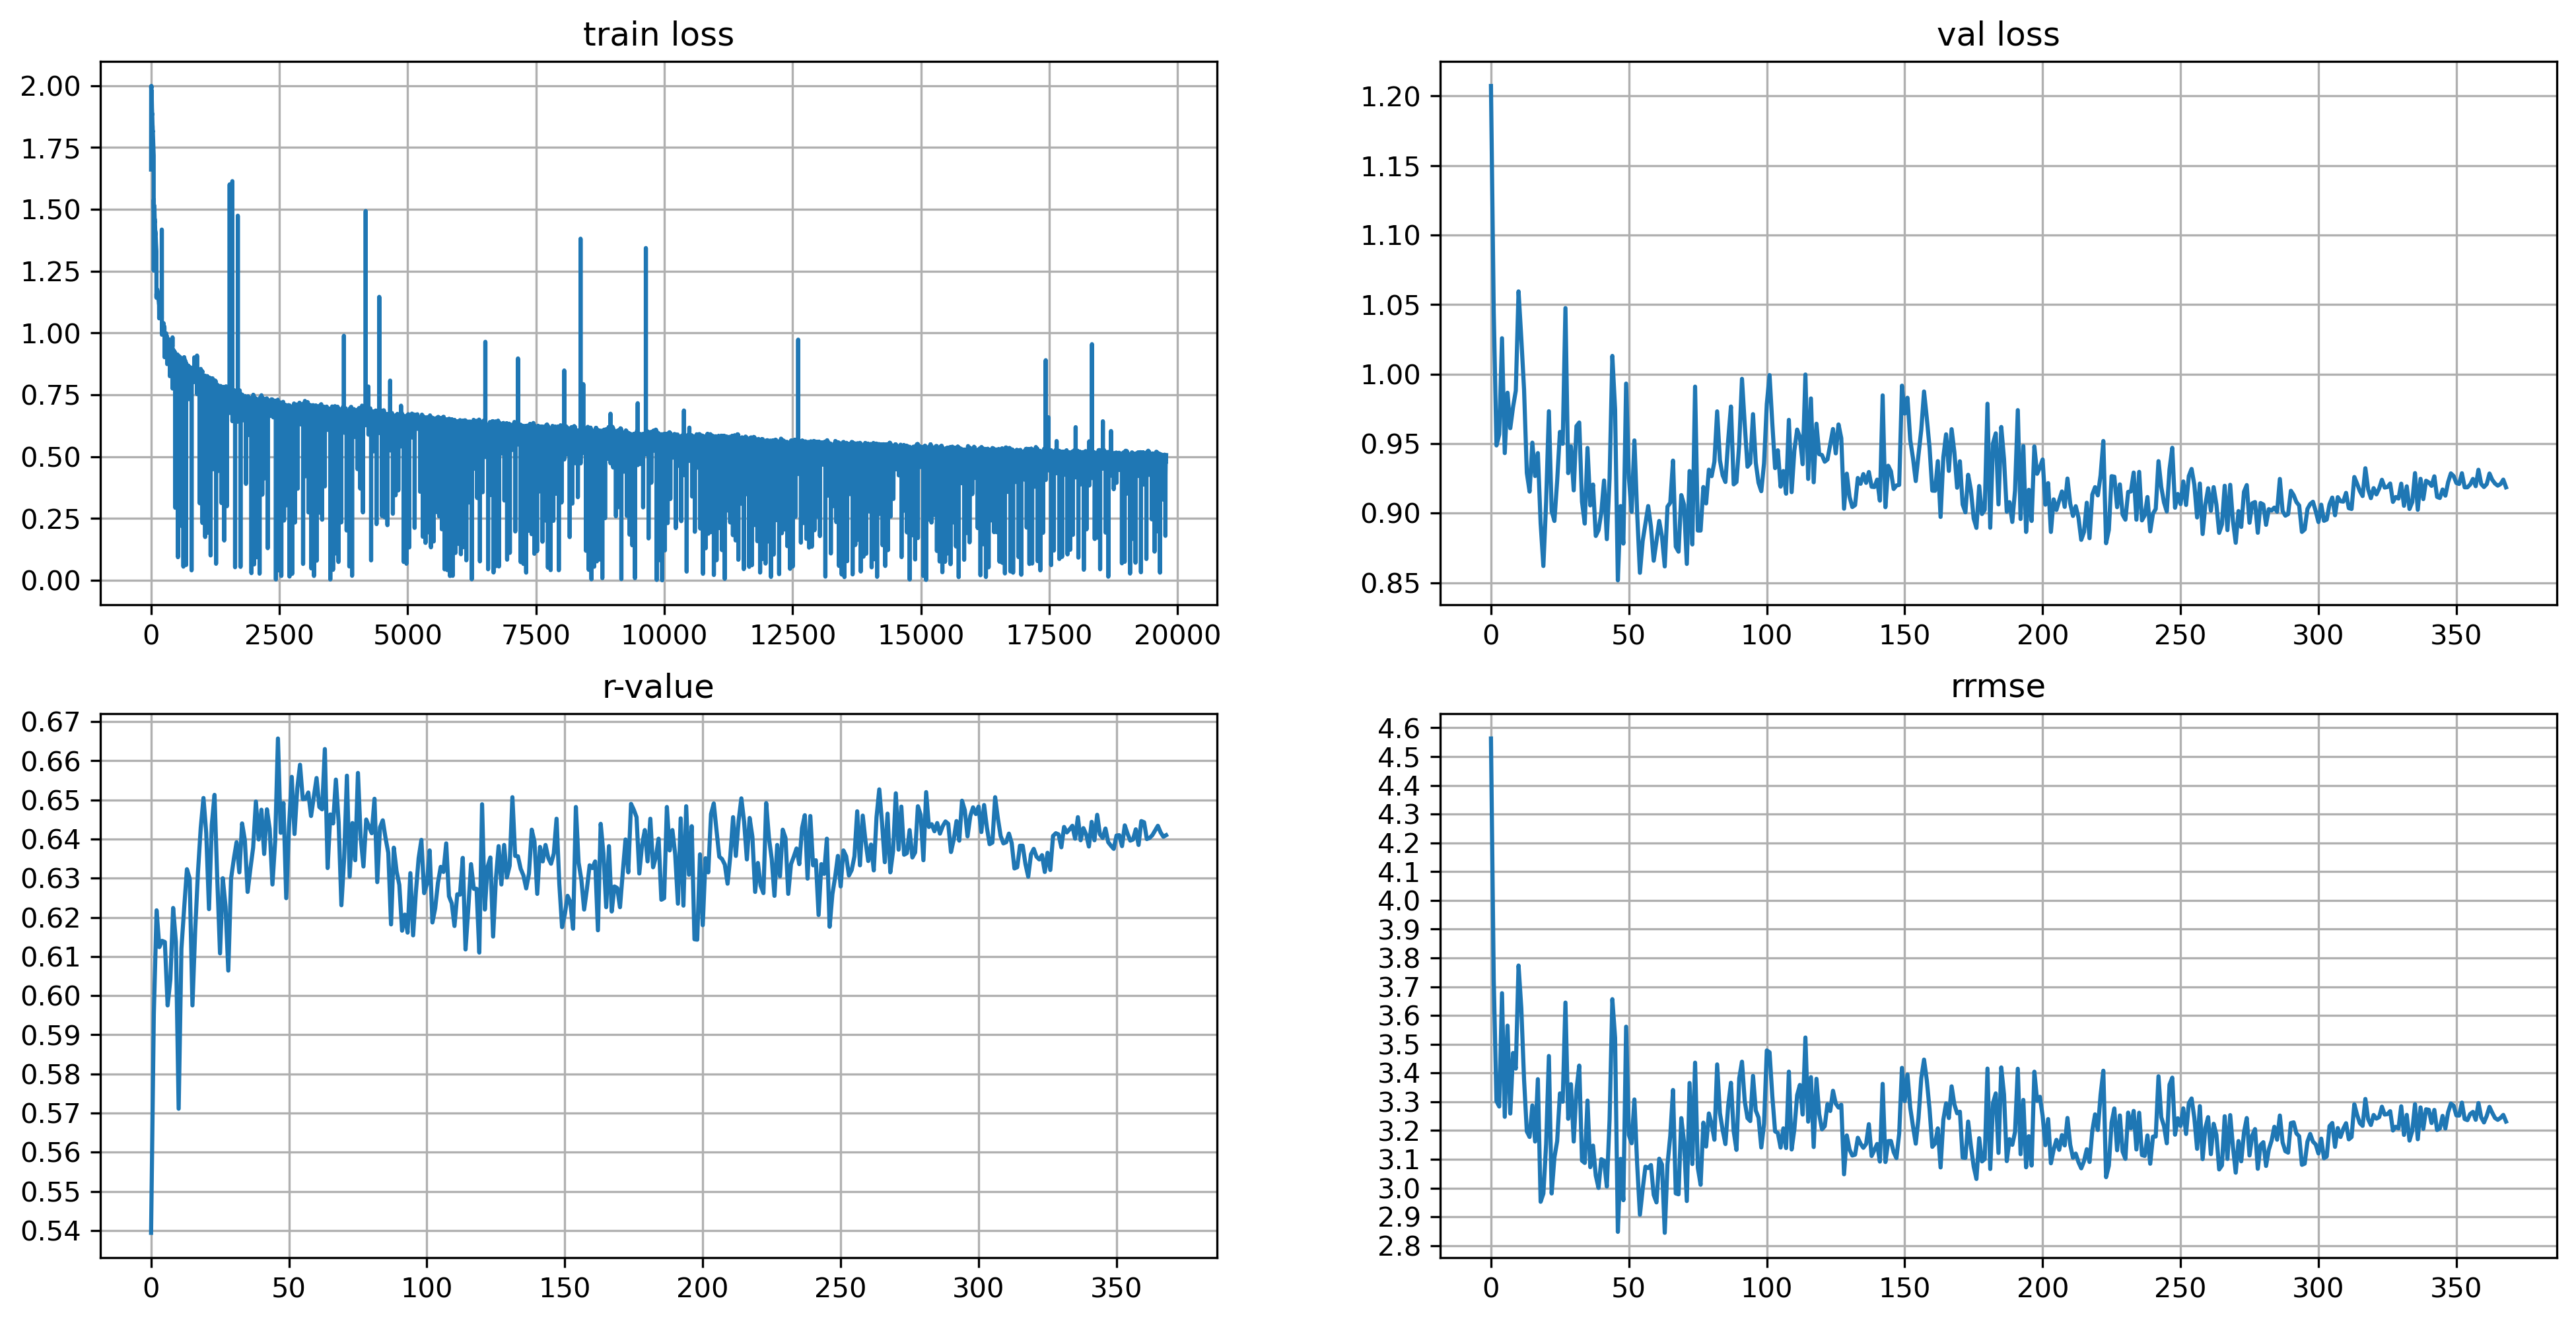

In [65]:
log_file = '../new_model_12.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

72425
dataset =  hard02
at epoch 163, loss = 2.907, rvalue = 0.6772, rrmse = 2.907


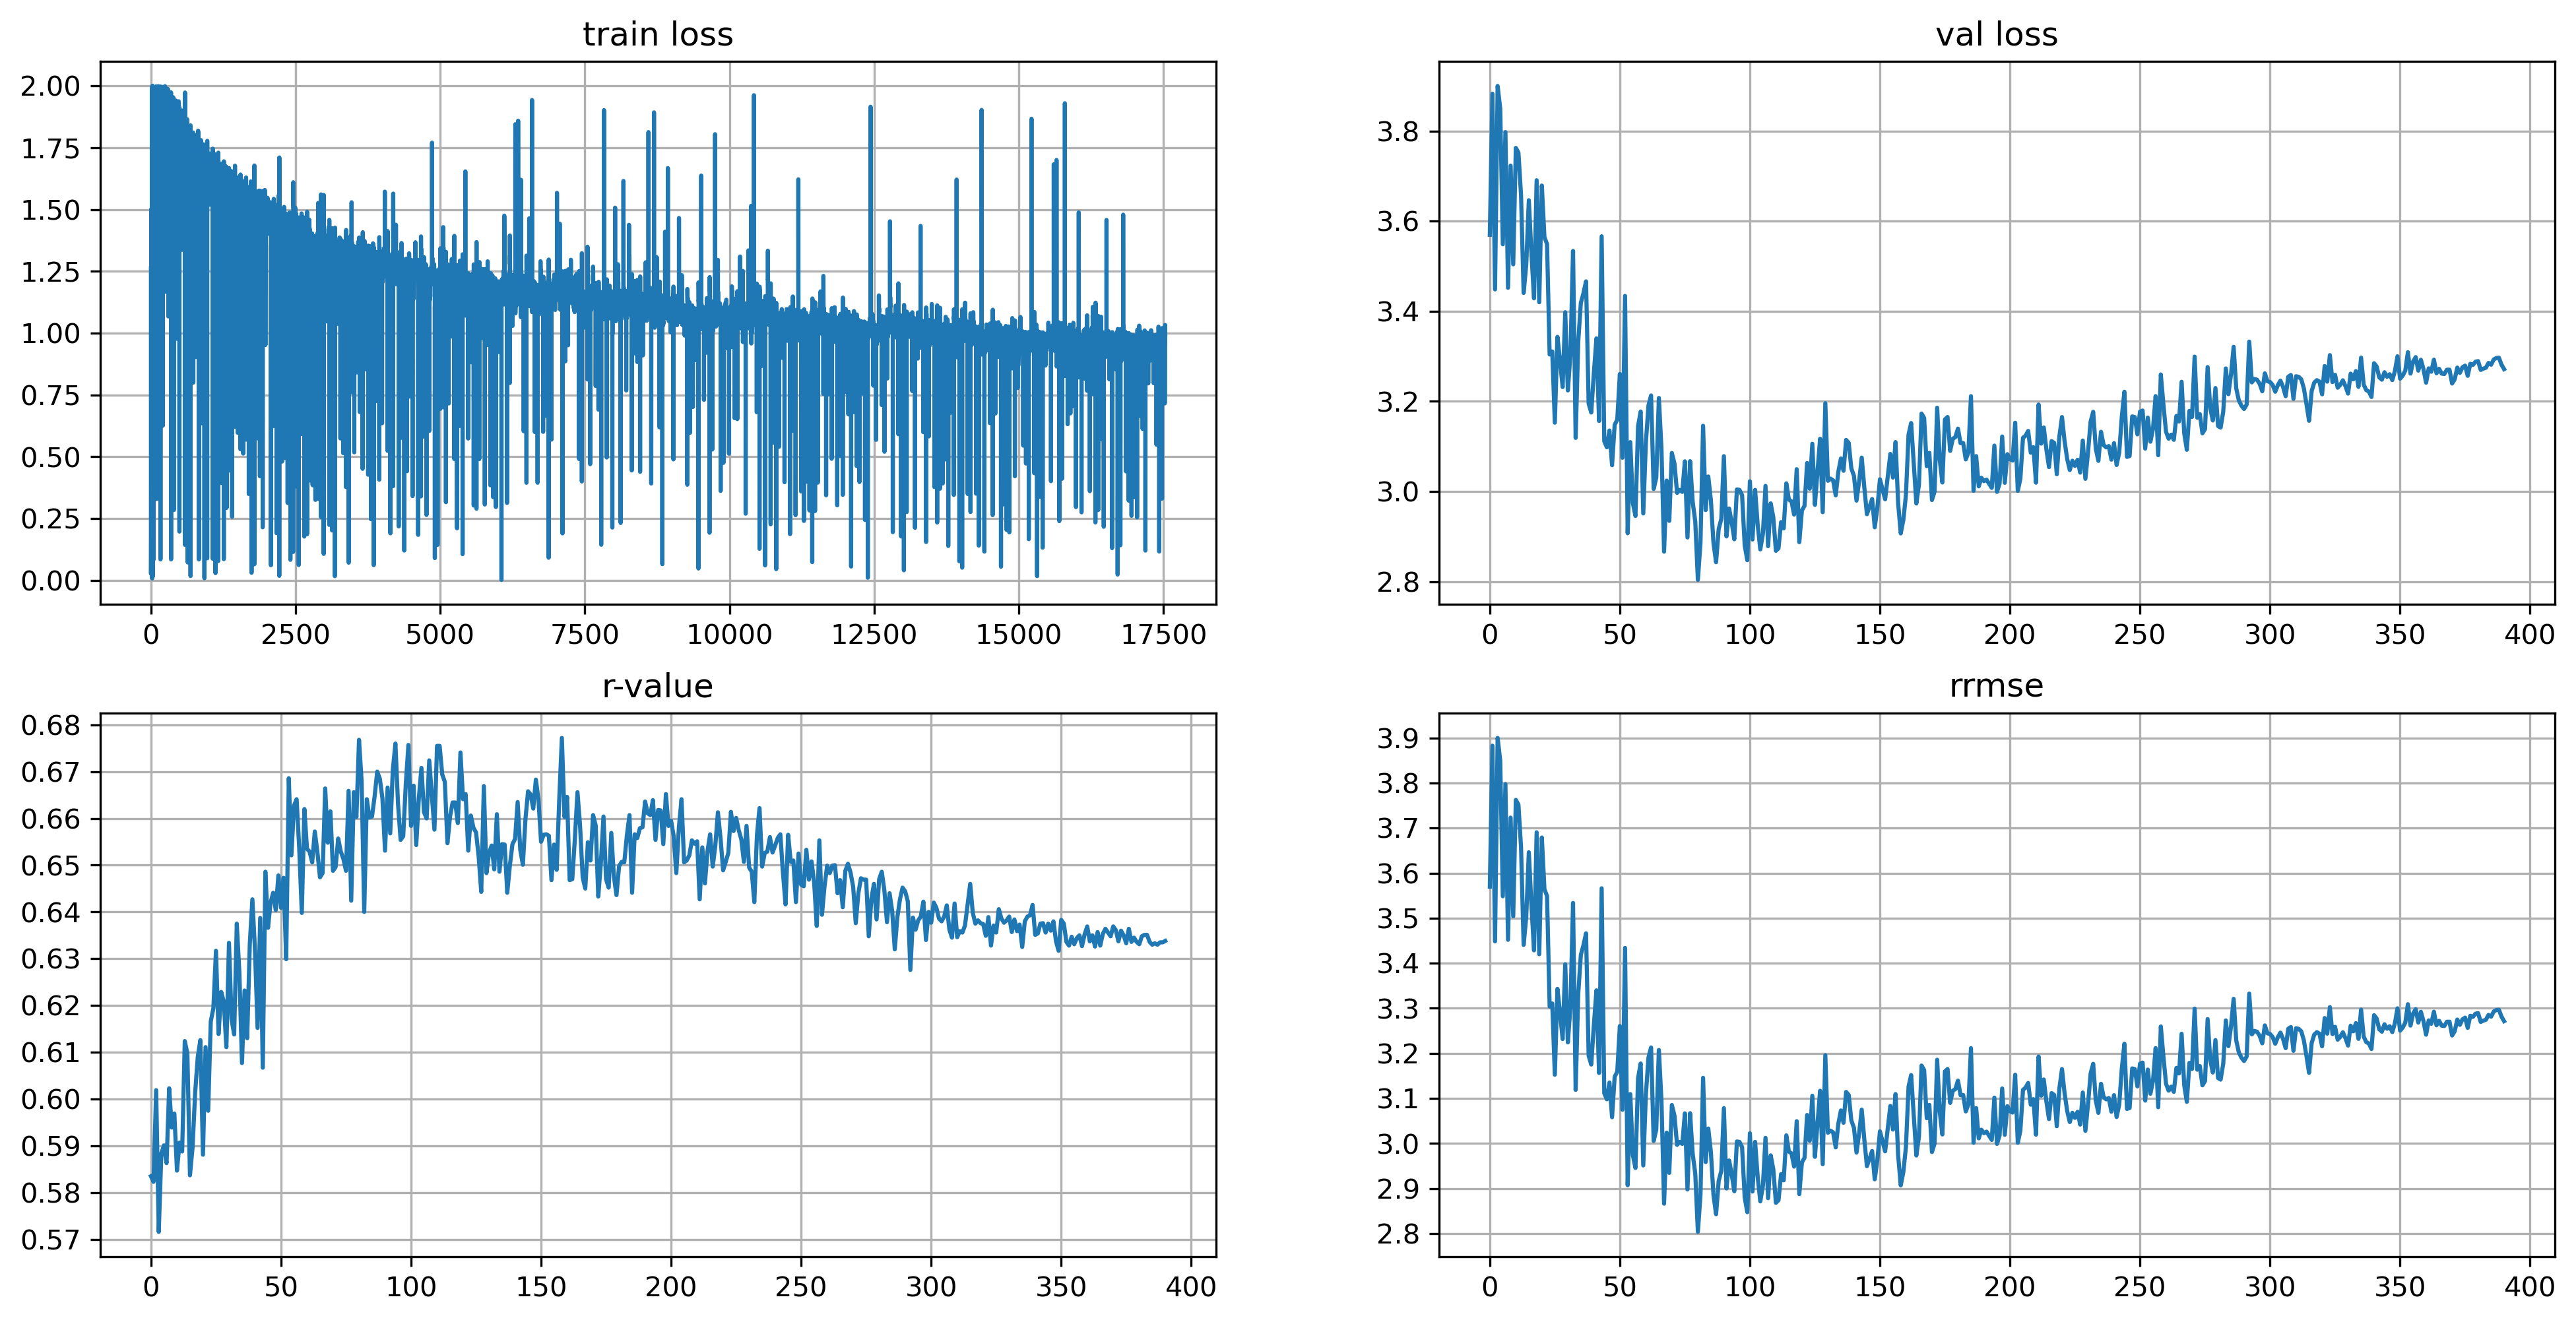

In [69]:
log_file = '../new_model_14.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

54024
dataset =  hard02
at epoch 28, loss = 3.0588, rvalue = 0.6653, rrmse = 3.0588


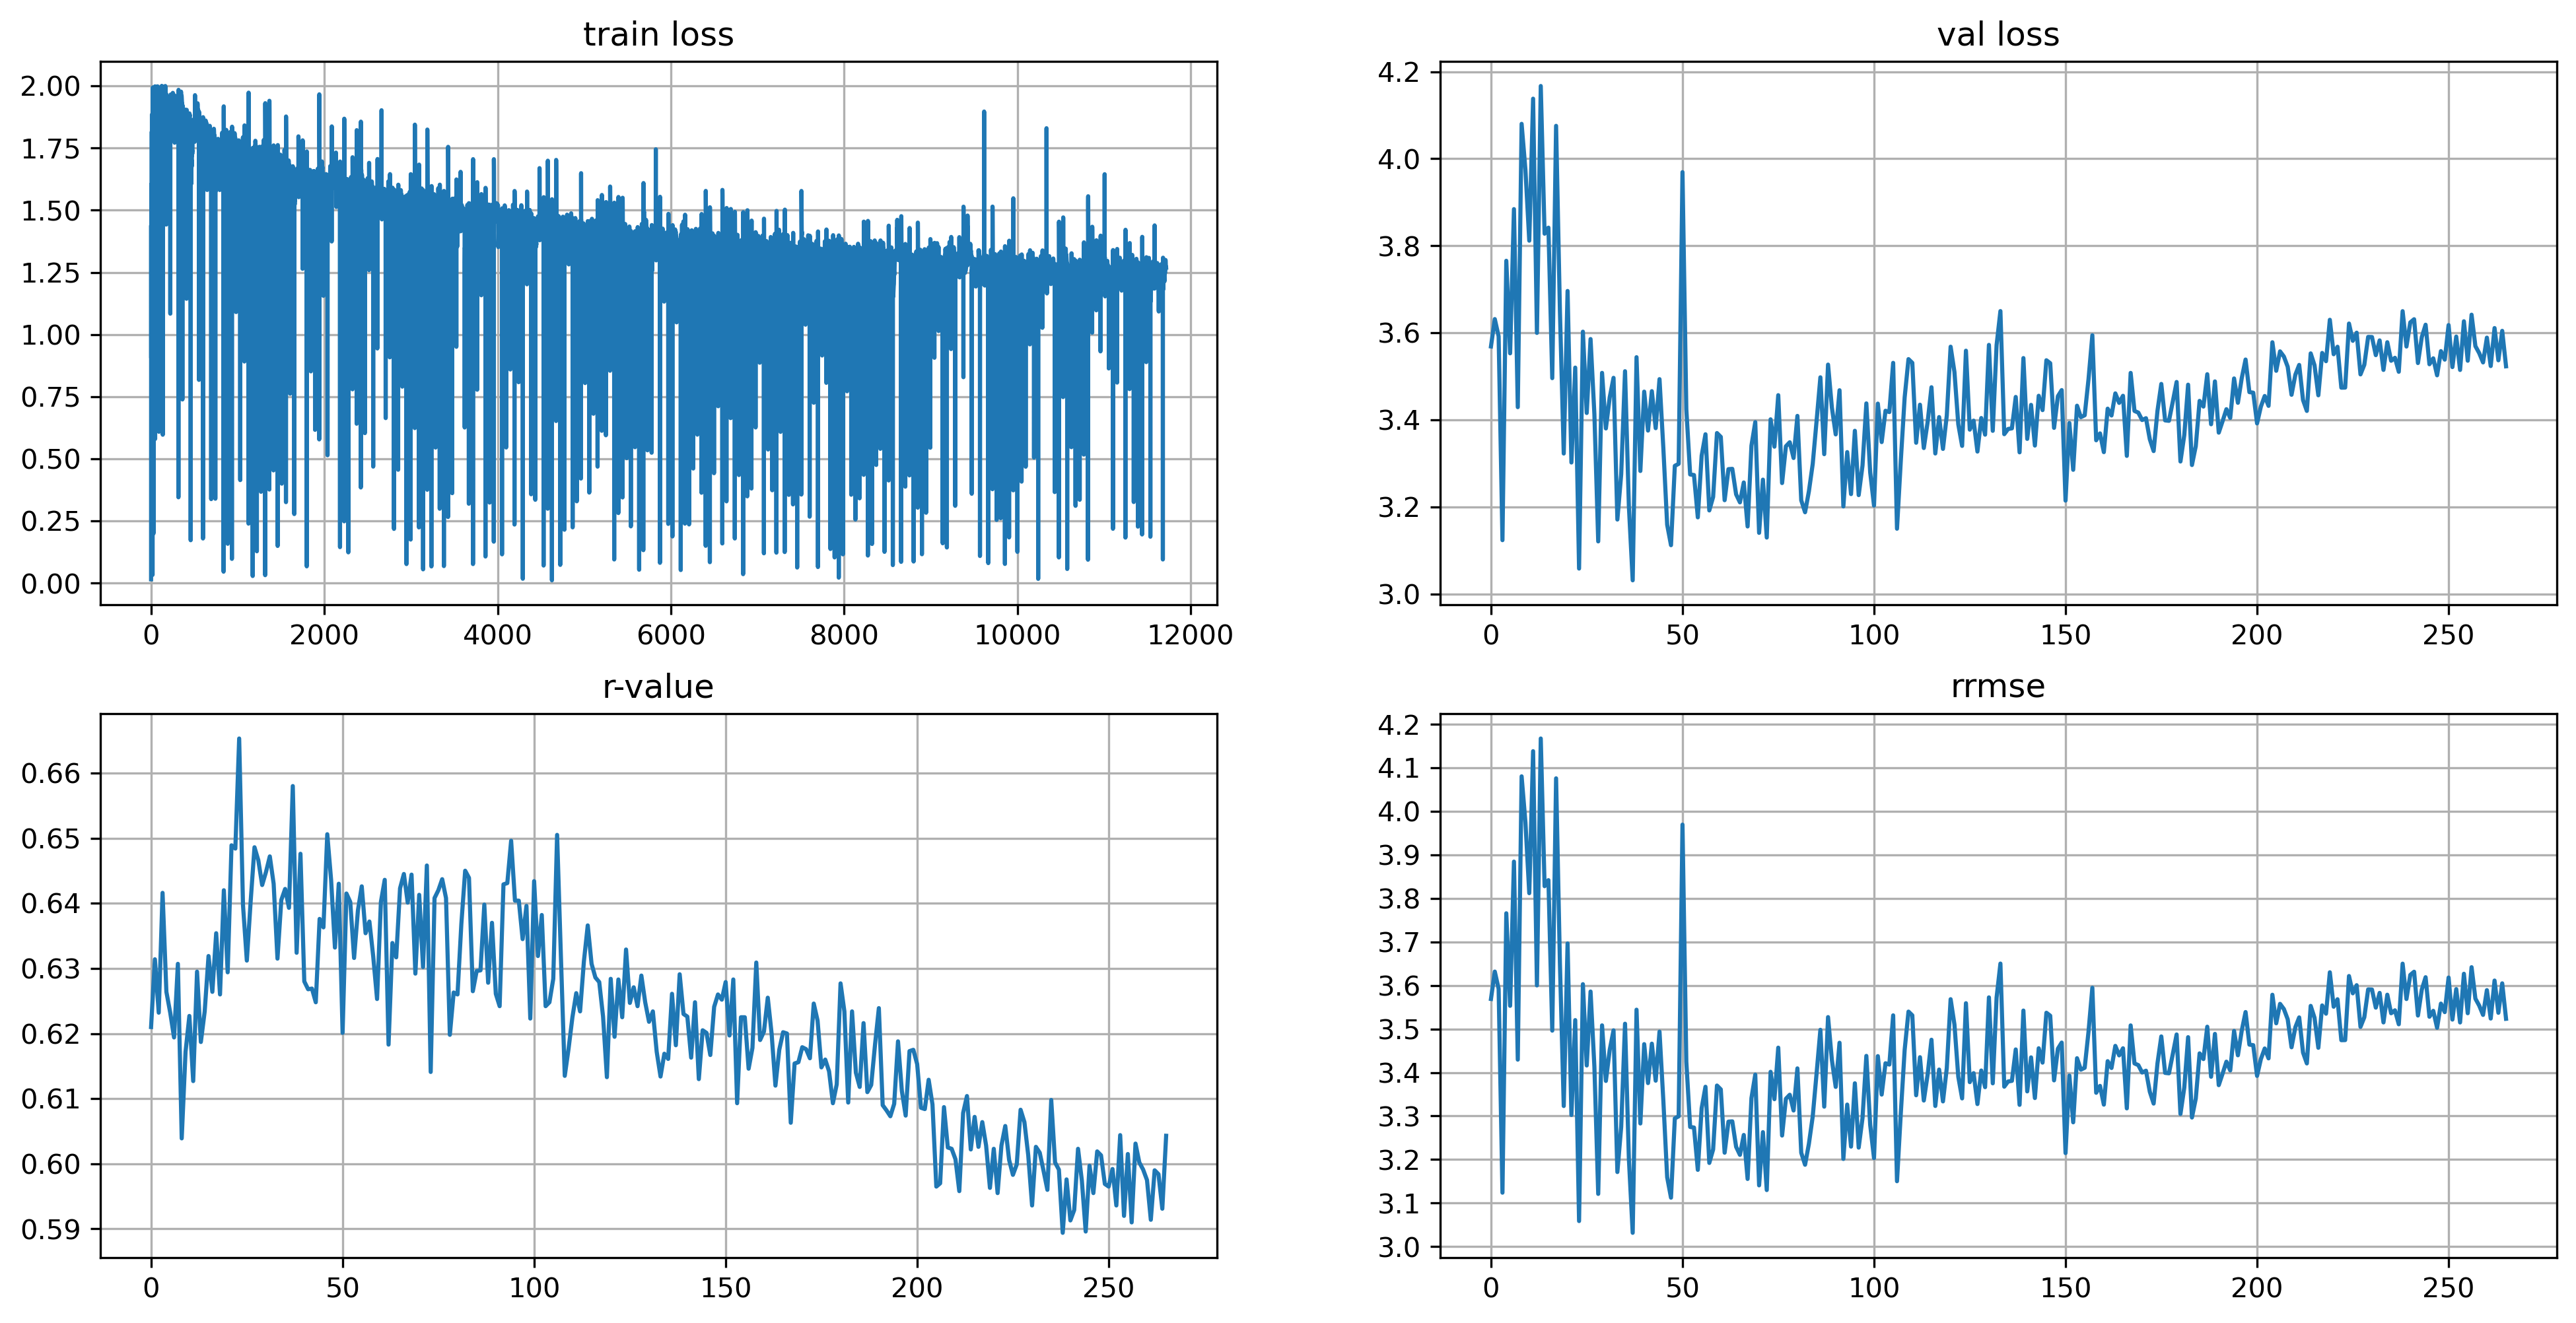

In [71]:
log_file = '../new_model_15.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

60562
dataset =  hard02
at epoch 18, loss = 3.3564, rvalue = 0.6656, rrmse = 3.3564


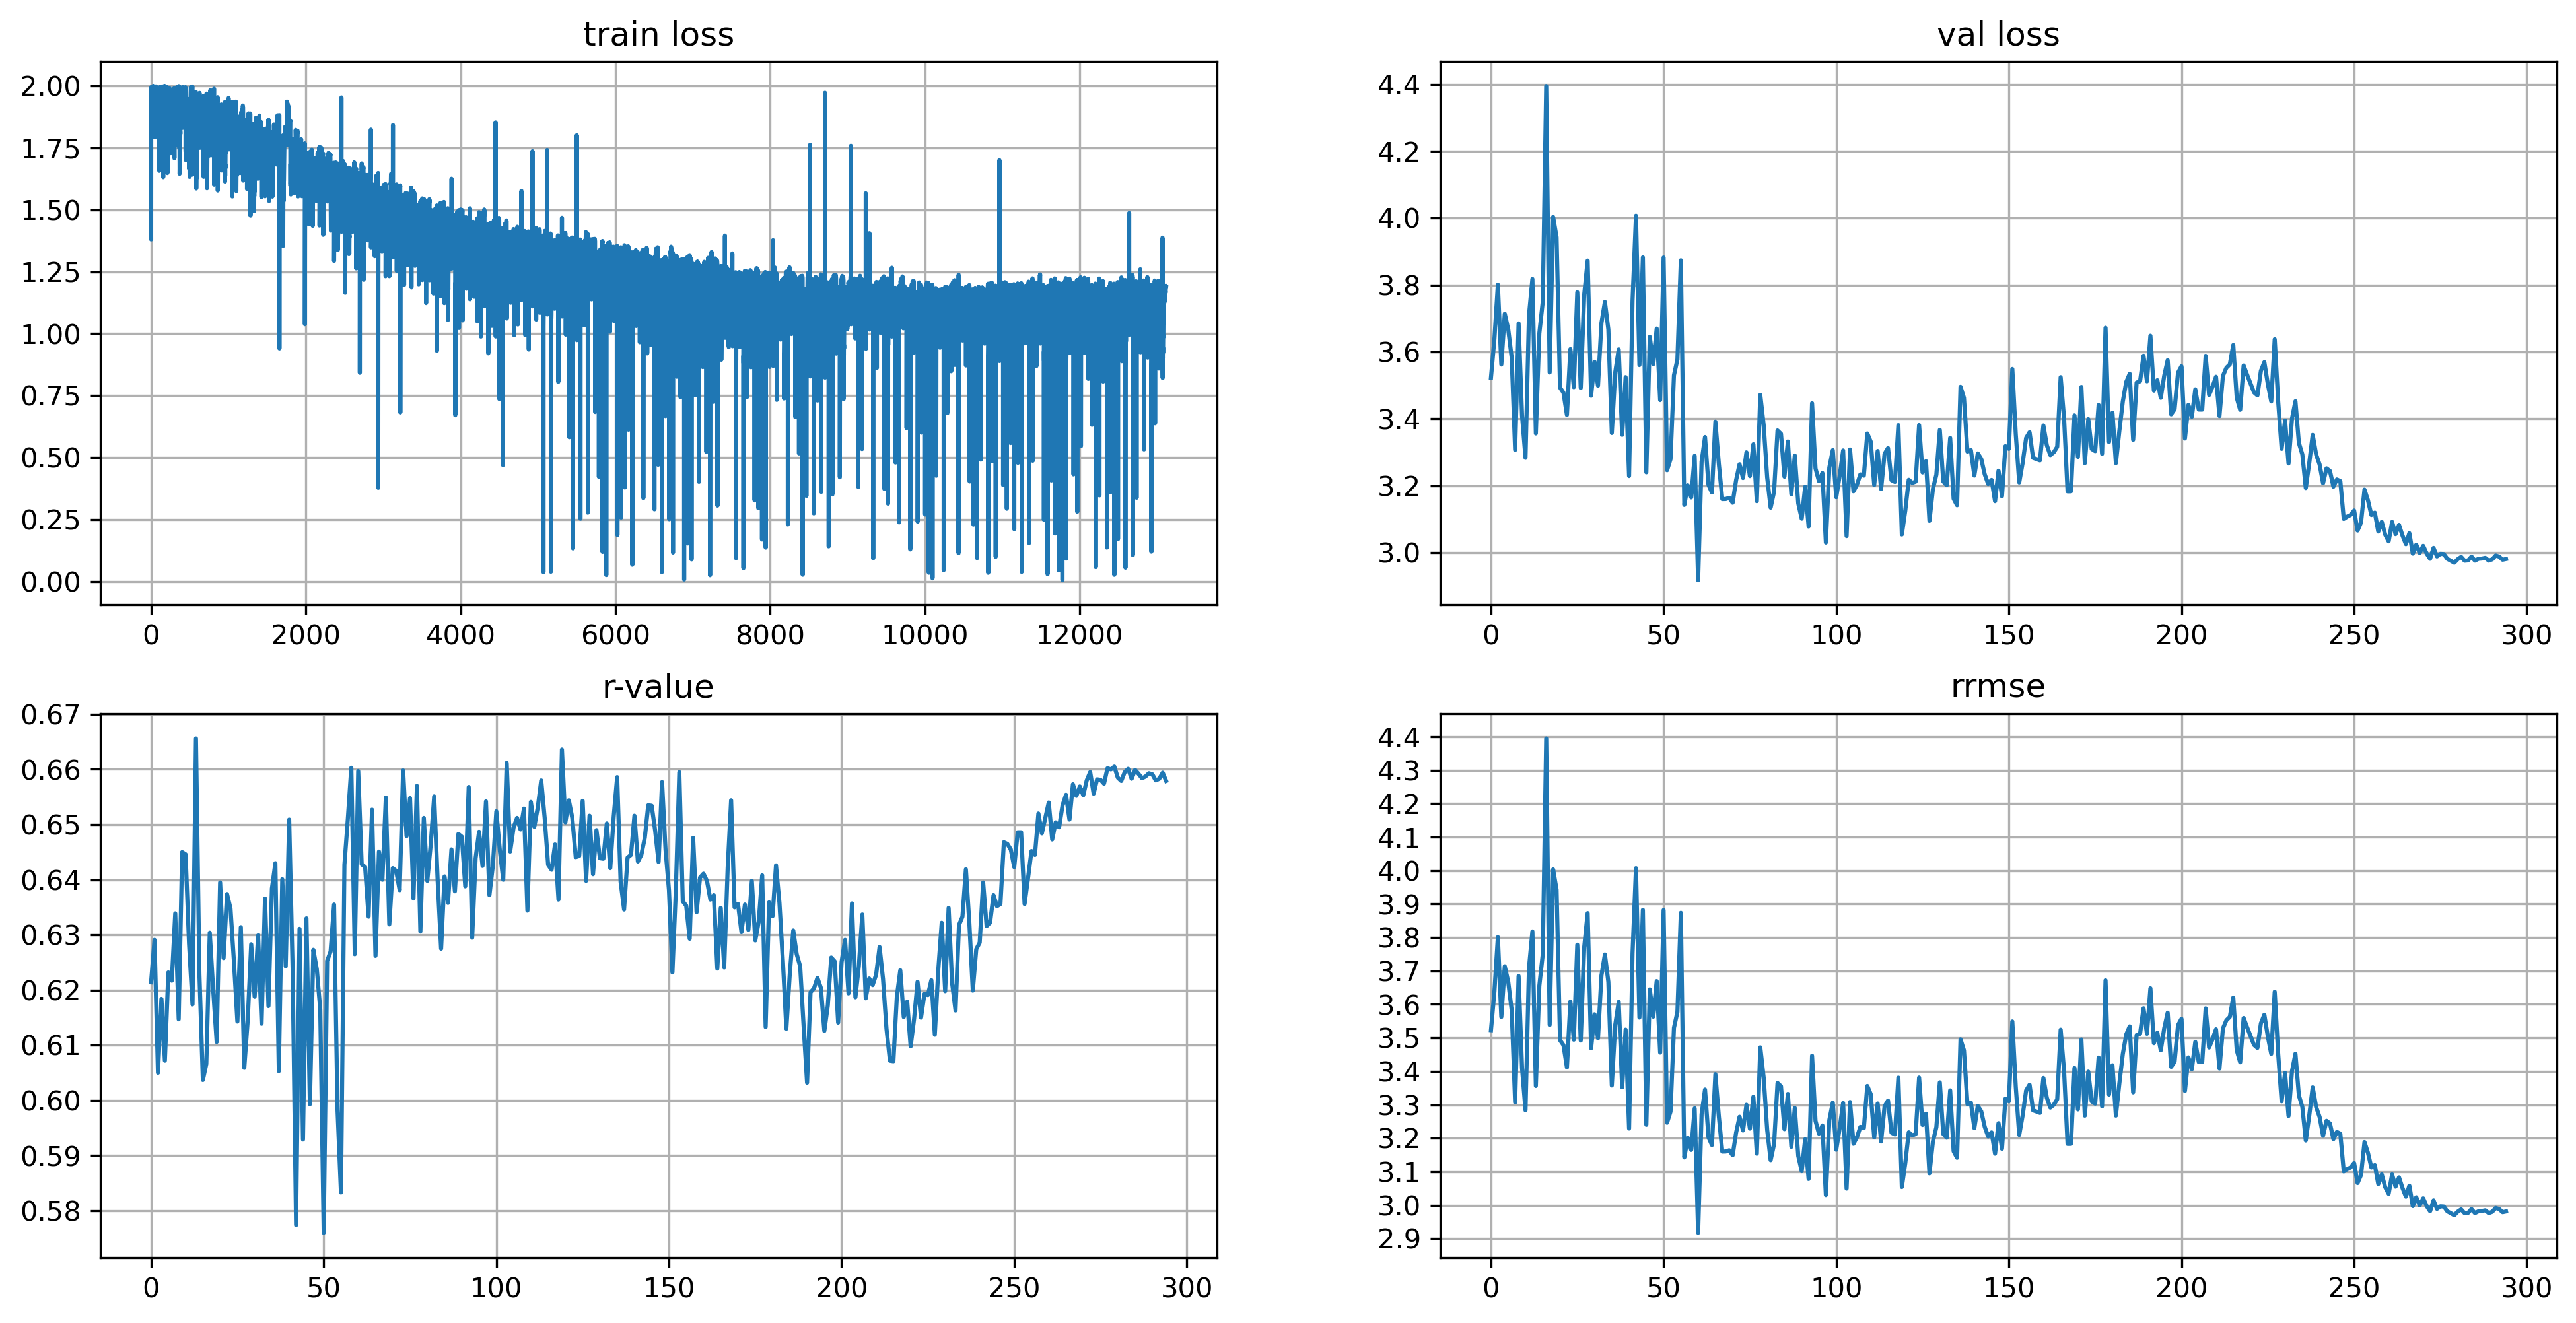

In [87]:
log_file = '../new_model_16.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

59600
dataset =  hard02
at epoch 46, loss = 3.0907, rvalue = 0.6742, rrmse = 3.0907


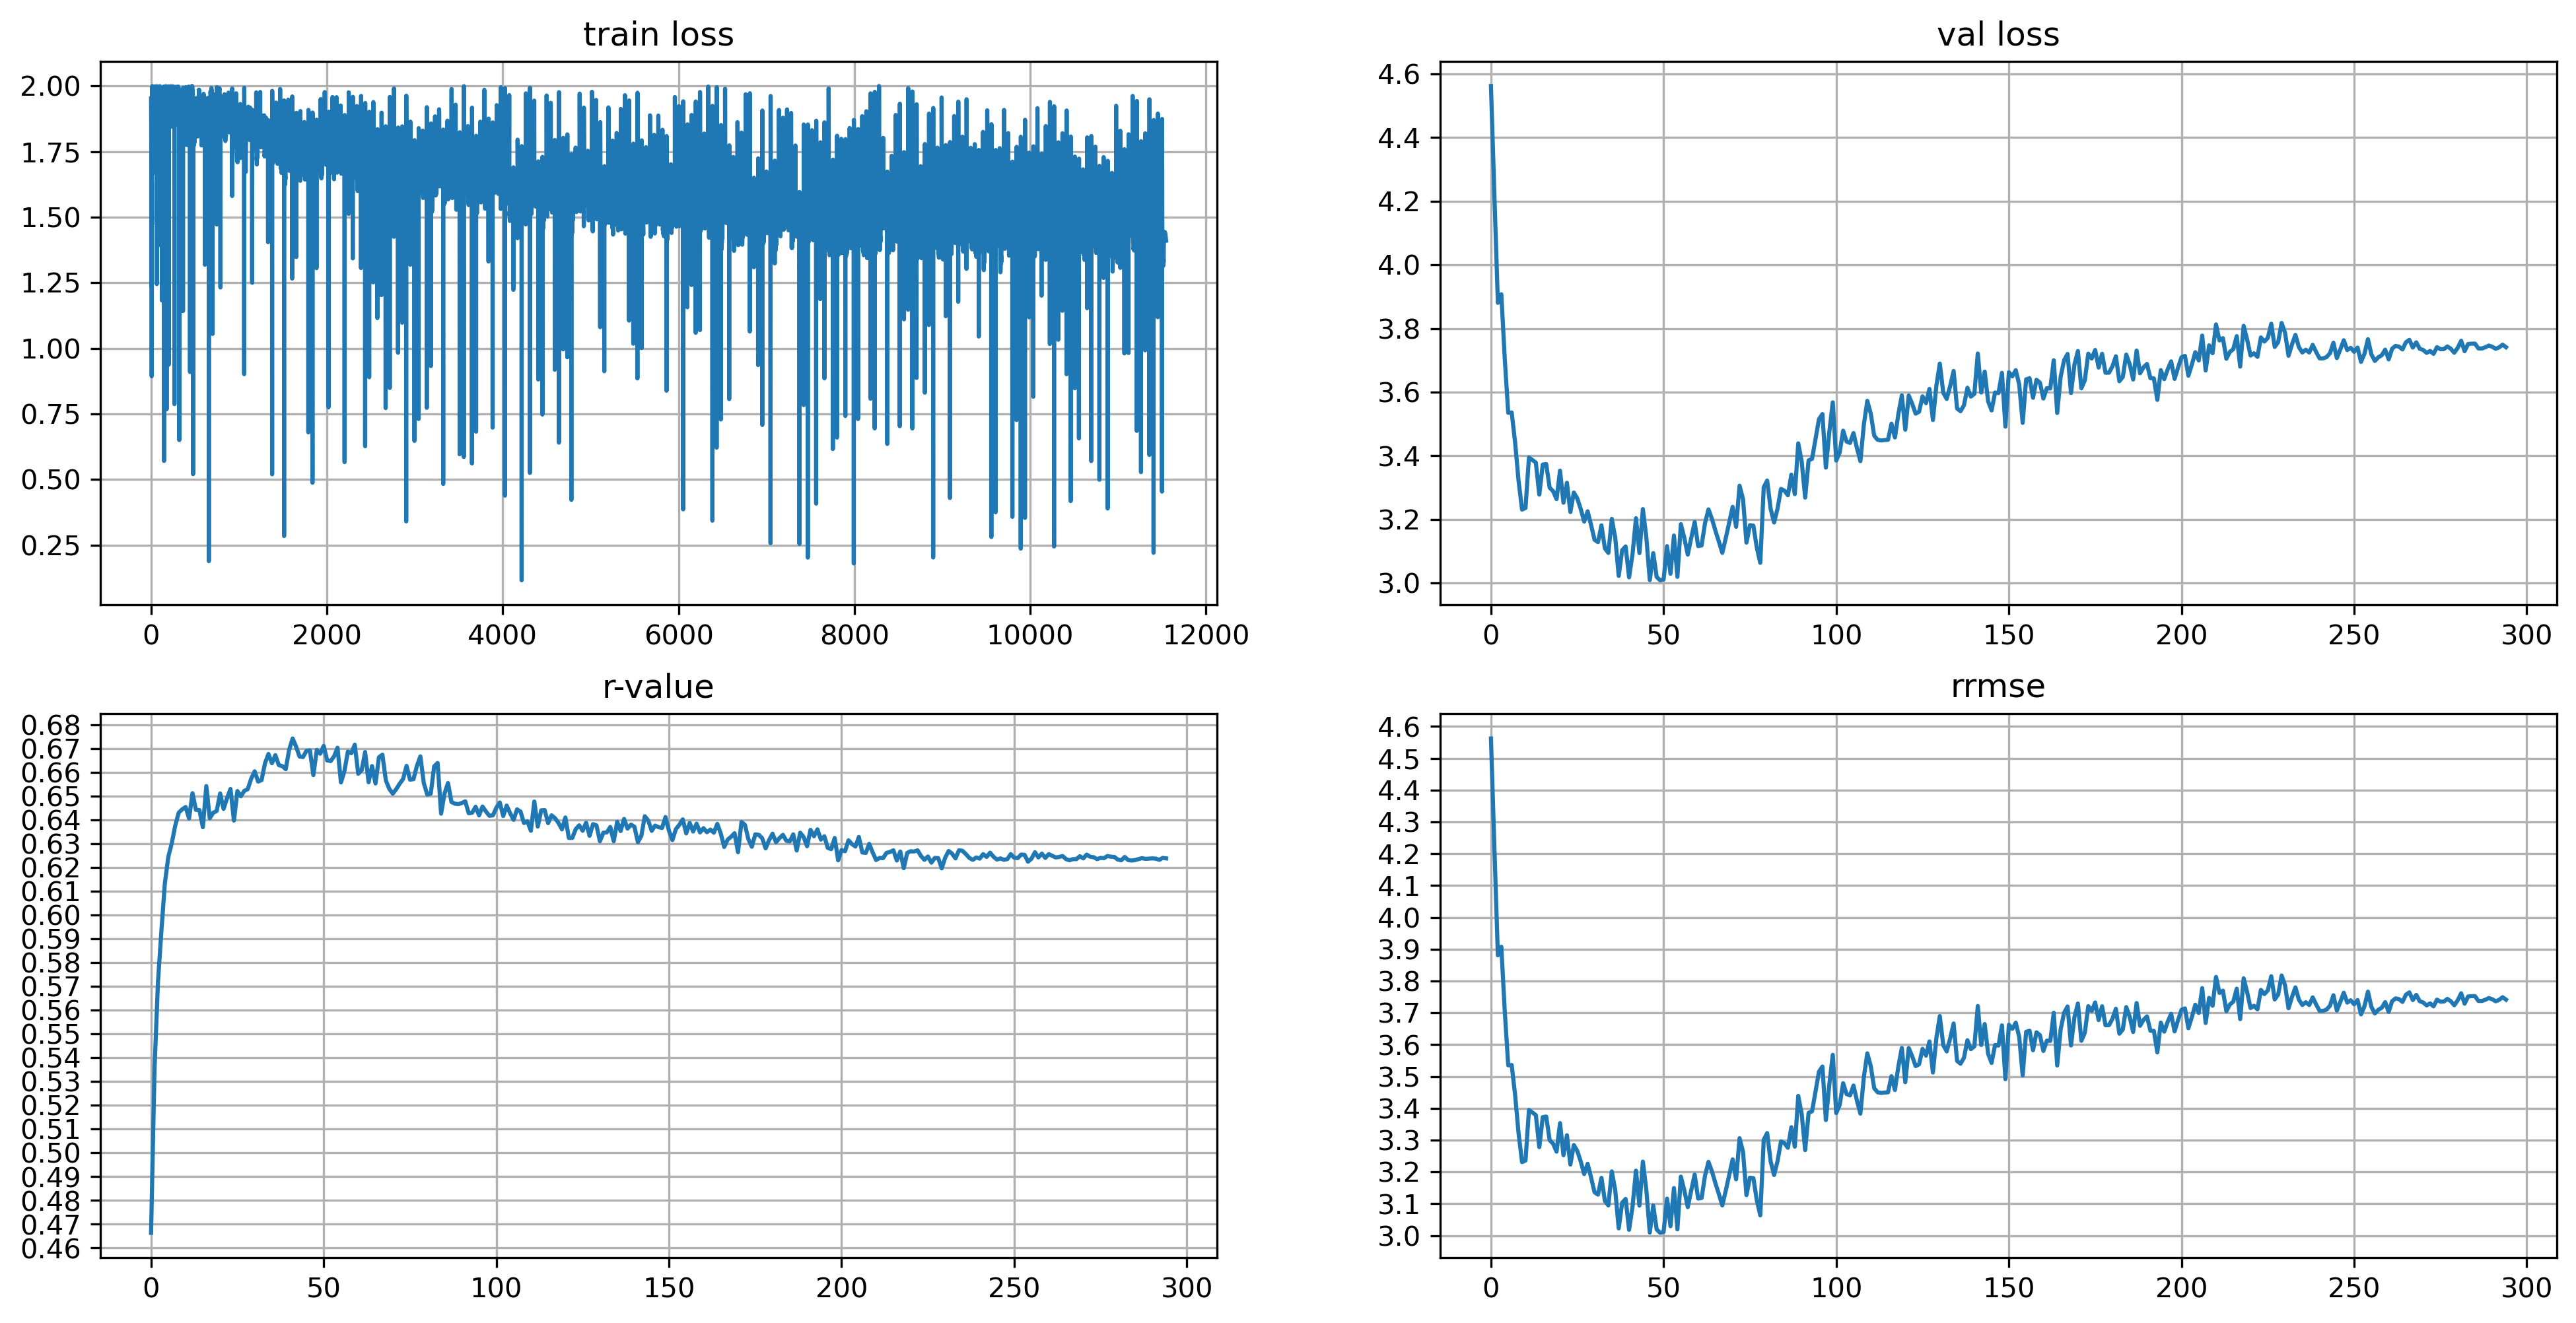

In [91]:
log_file = '../new_model_17.log'
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, loss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < 2.0)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

55332
dataset =  hard02
at epoch 275, valloss = 3.6126, rvalue = 0.5958, rrmse = 3.6126


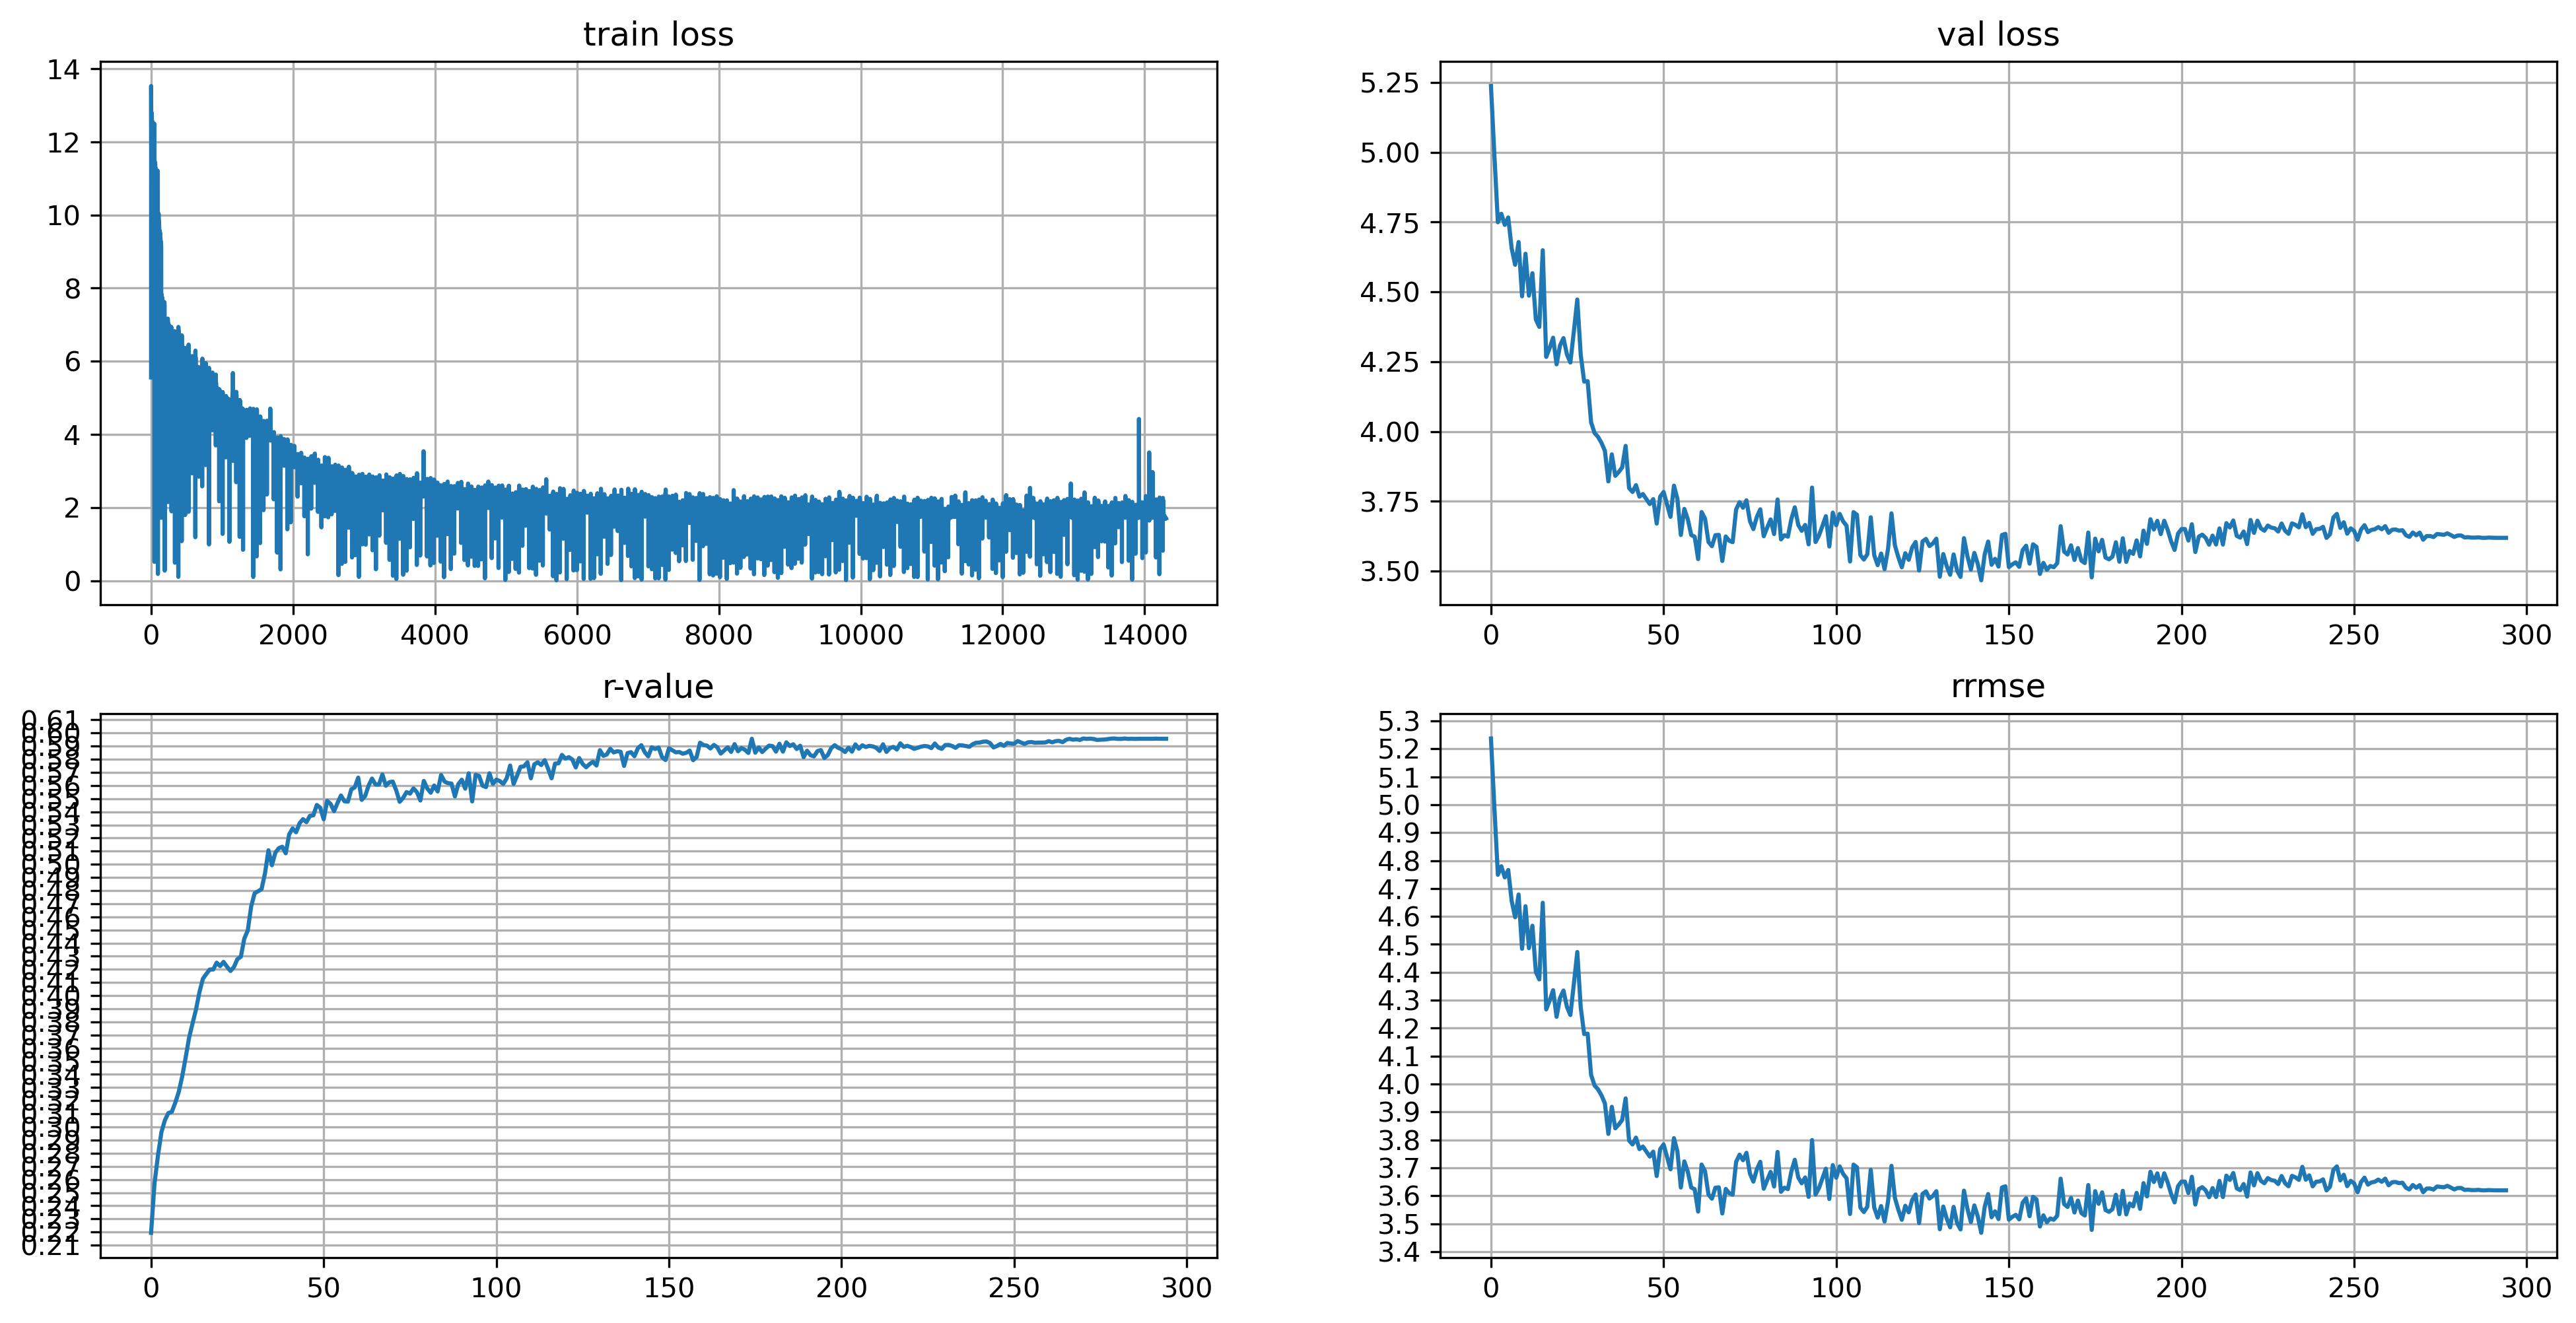

In [99]:
log_file = '../new_model_18.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

35389
dataset =  hard02
at epoch 190, valloss = 3.5139, rvalue = 0.5864, rrmse = 3.5139


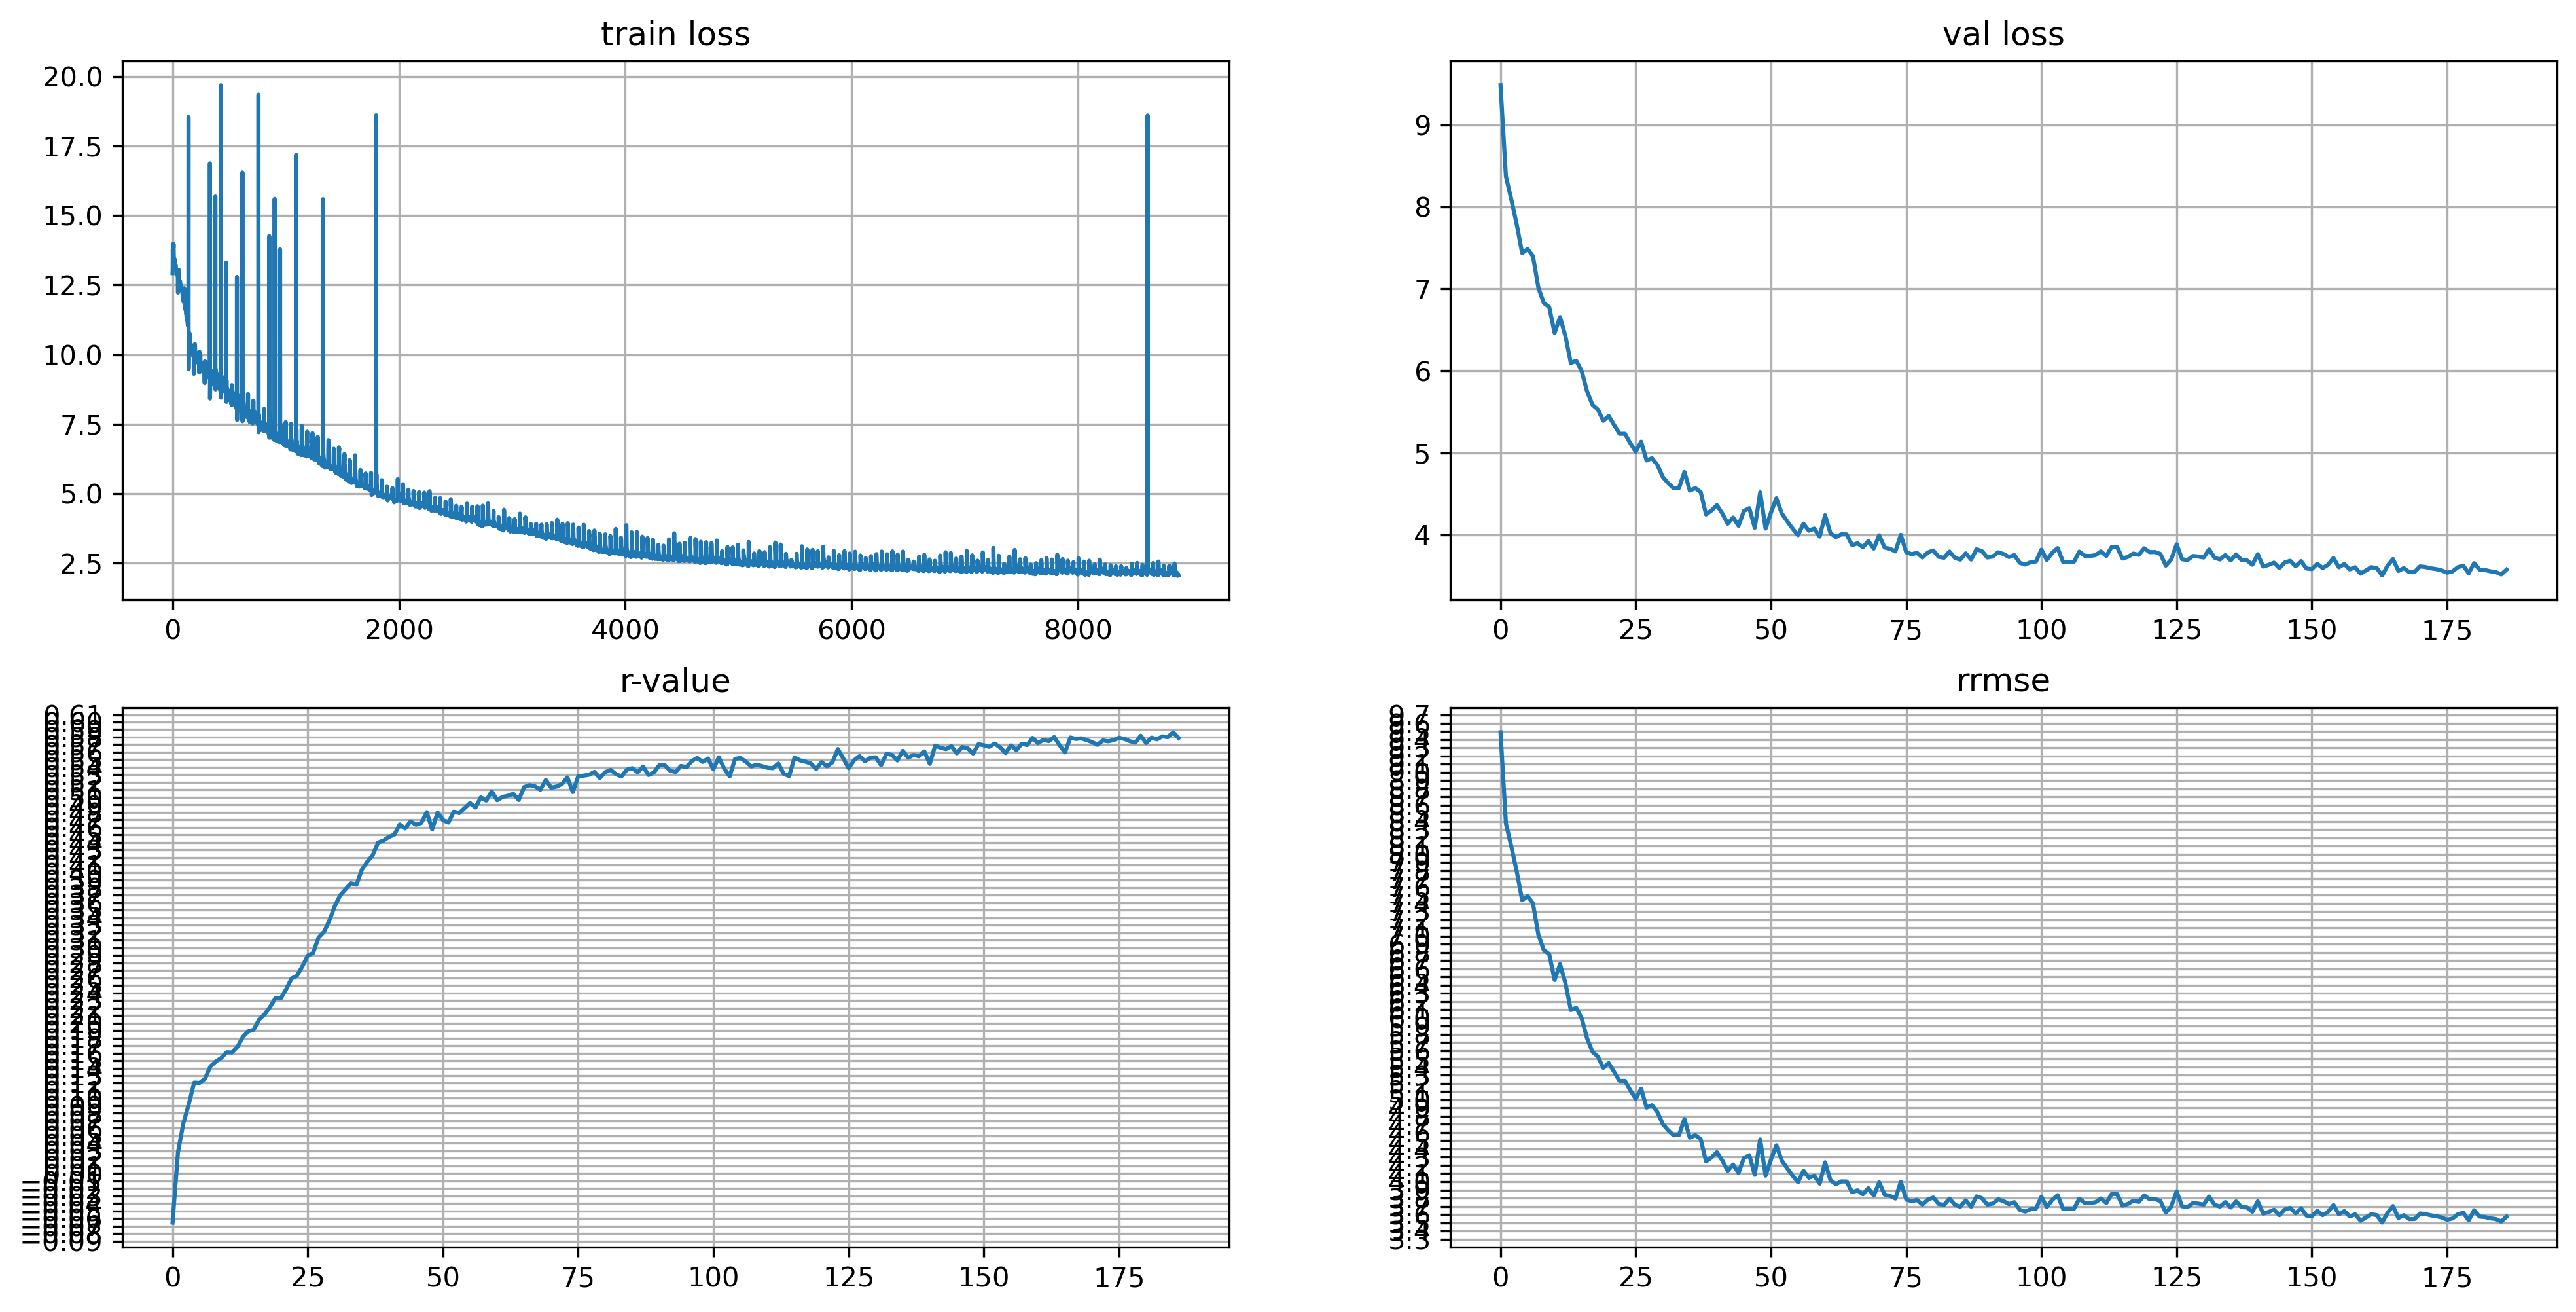

In [100]:
log_file = '../new_model_19.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

55295
dataset =  hard02
at epoch 245, valloss = 3.1439, rvalue = 0.6591, rrmse = 3.1439


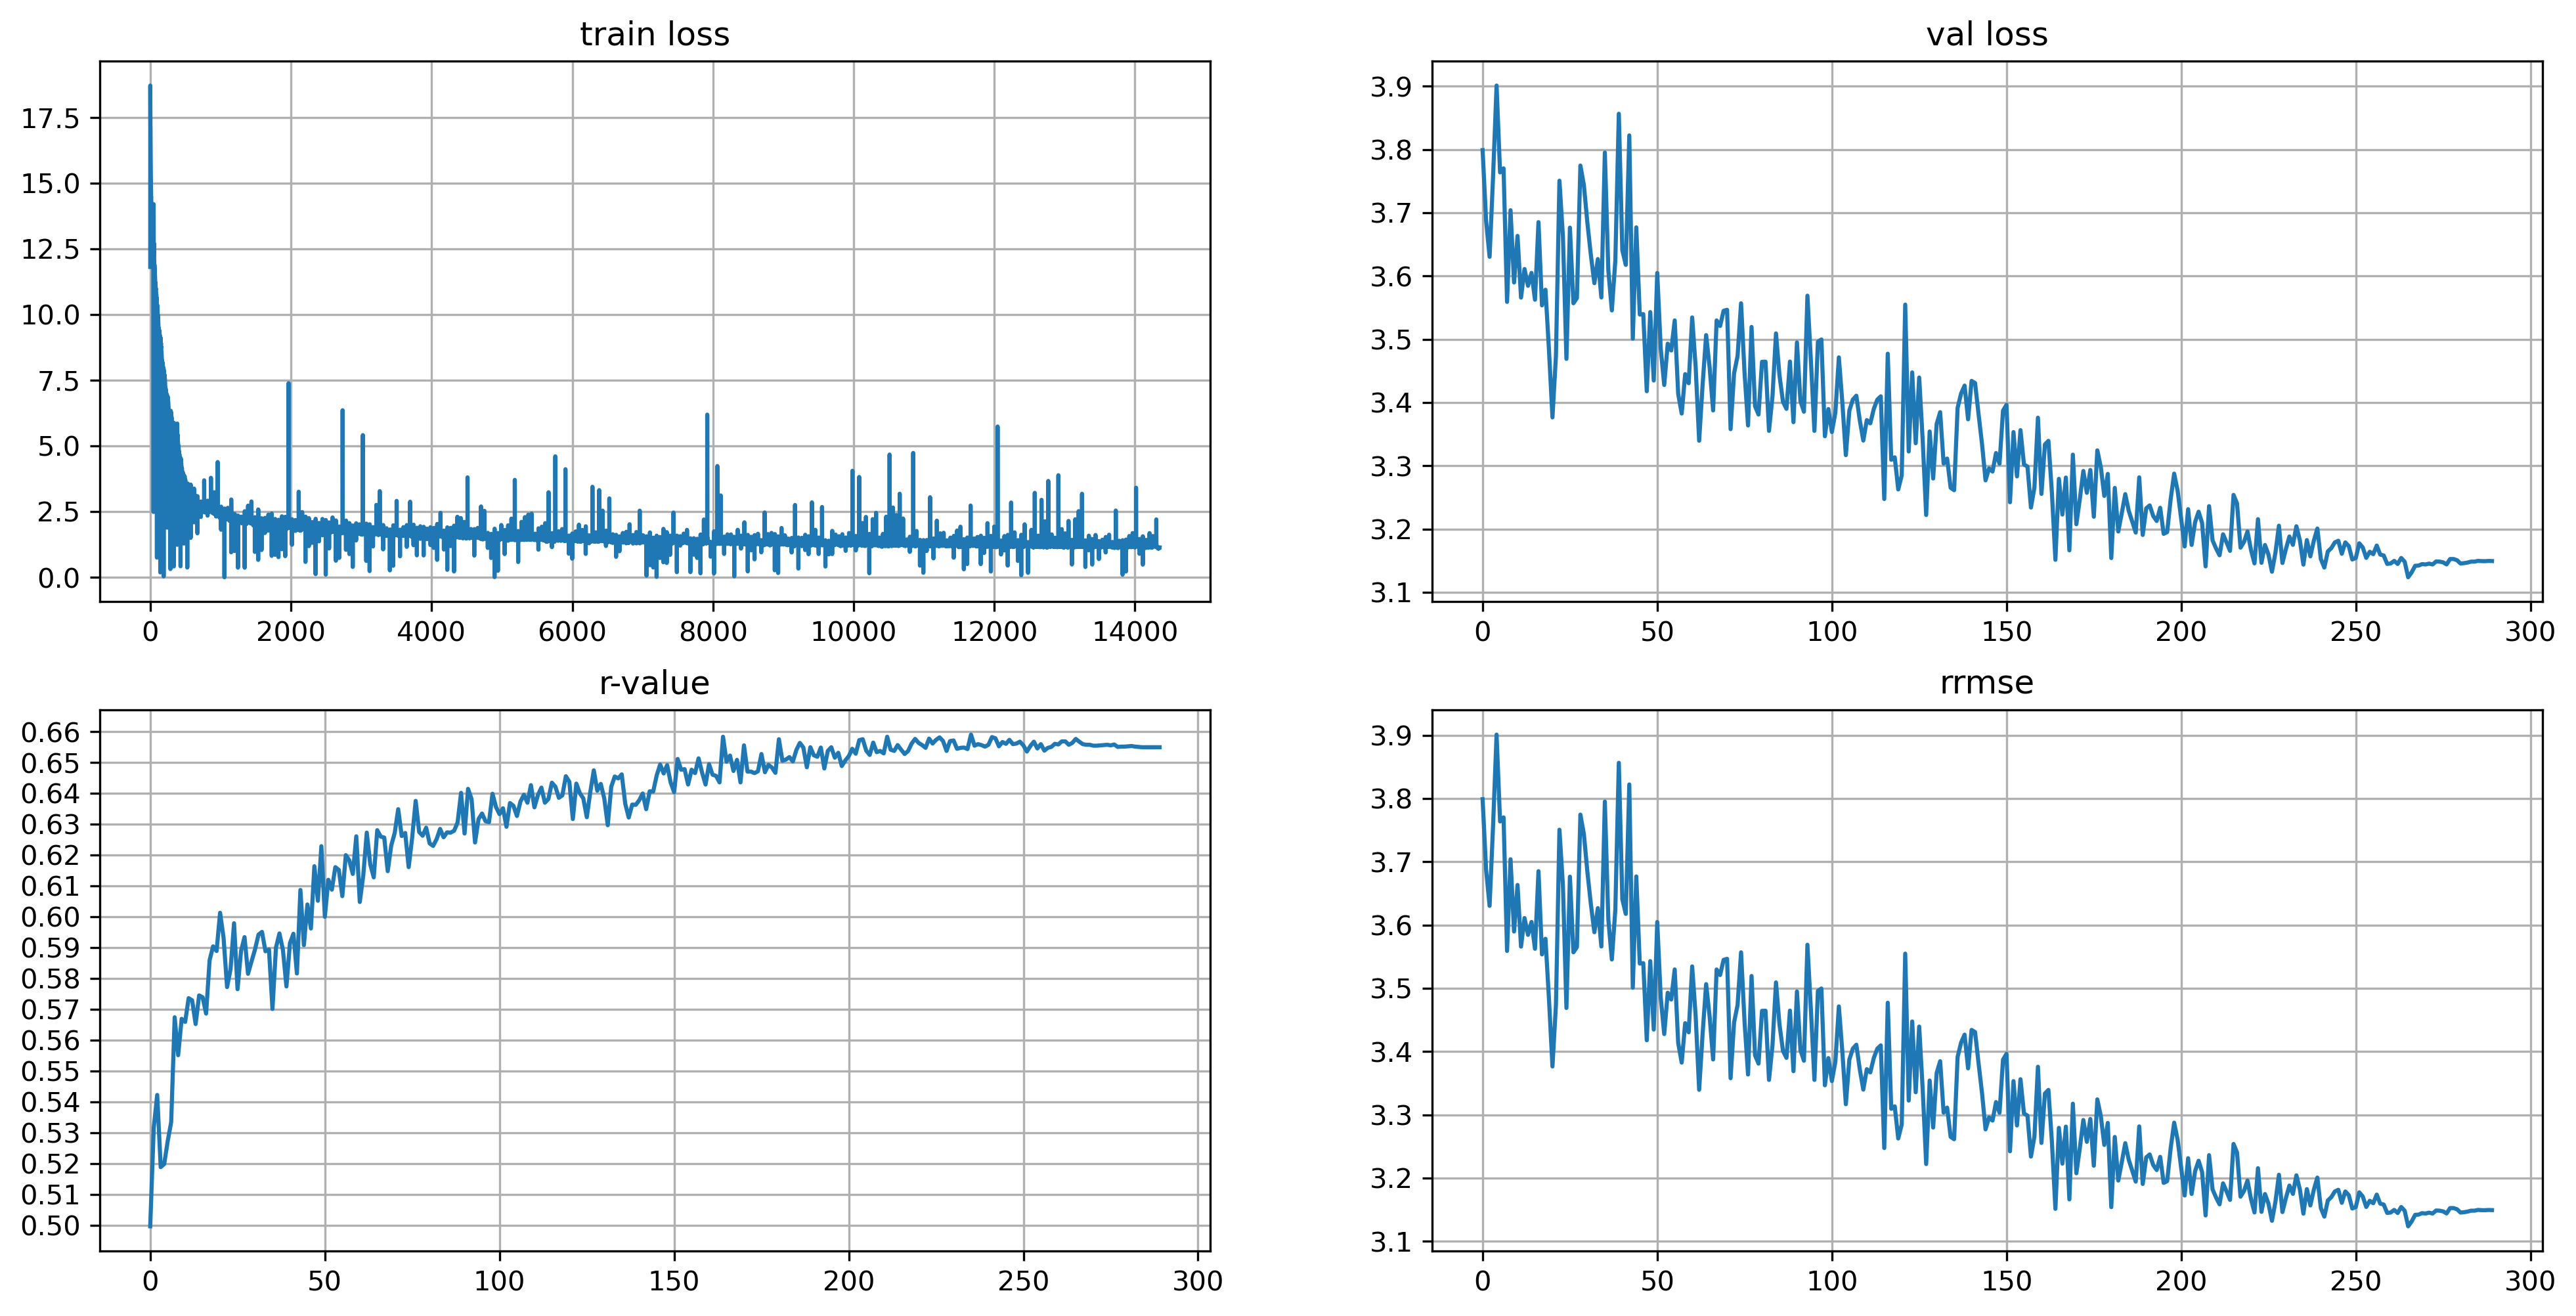

In [107]:
log_file = '../new_model_20.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 10
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

55066
dataset =  hard02
at epoch 219, valloss = 3.097, rvalue = 0.648, rrmse = 3.097


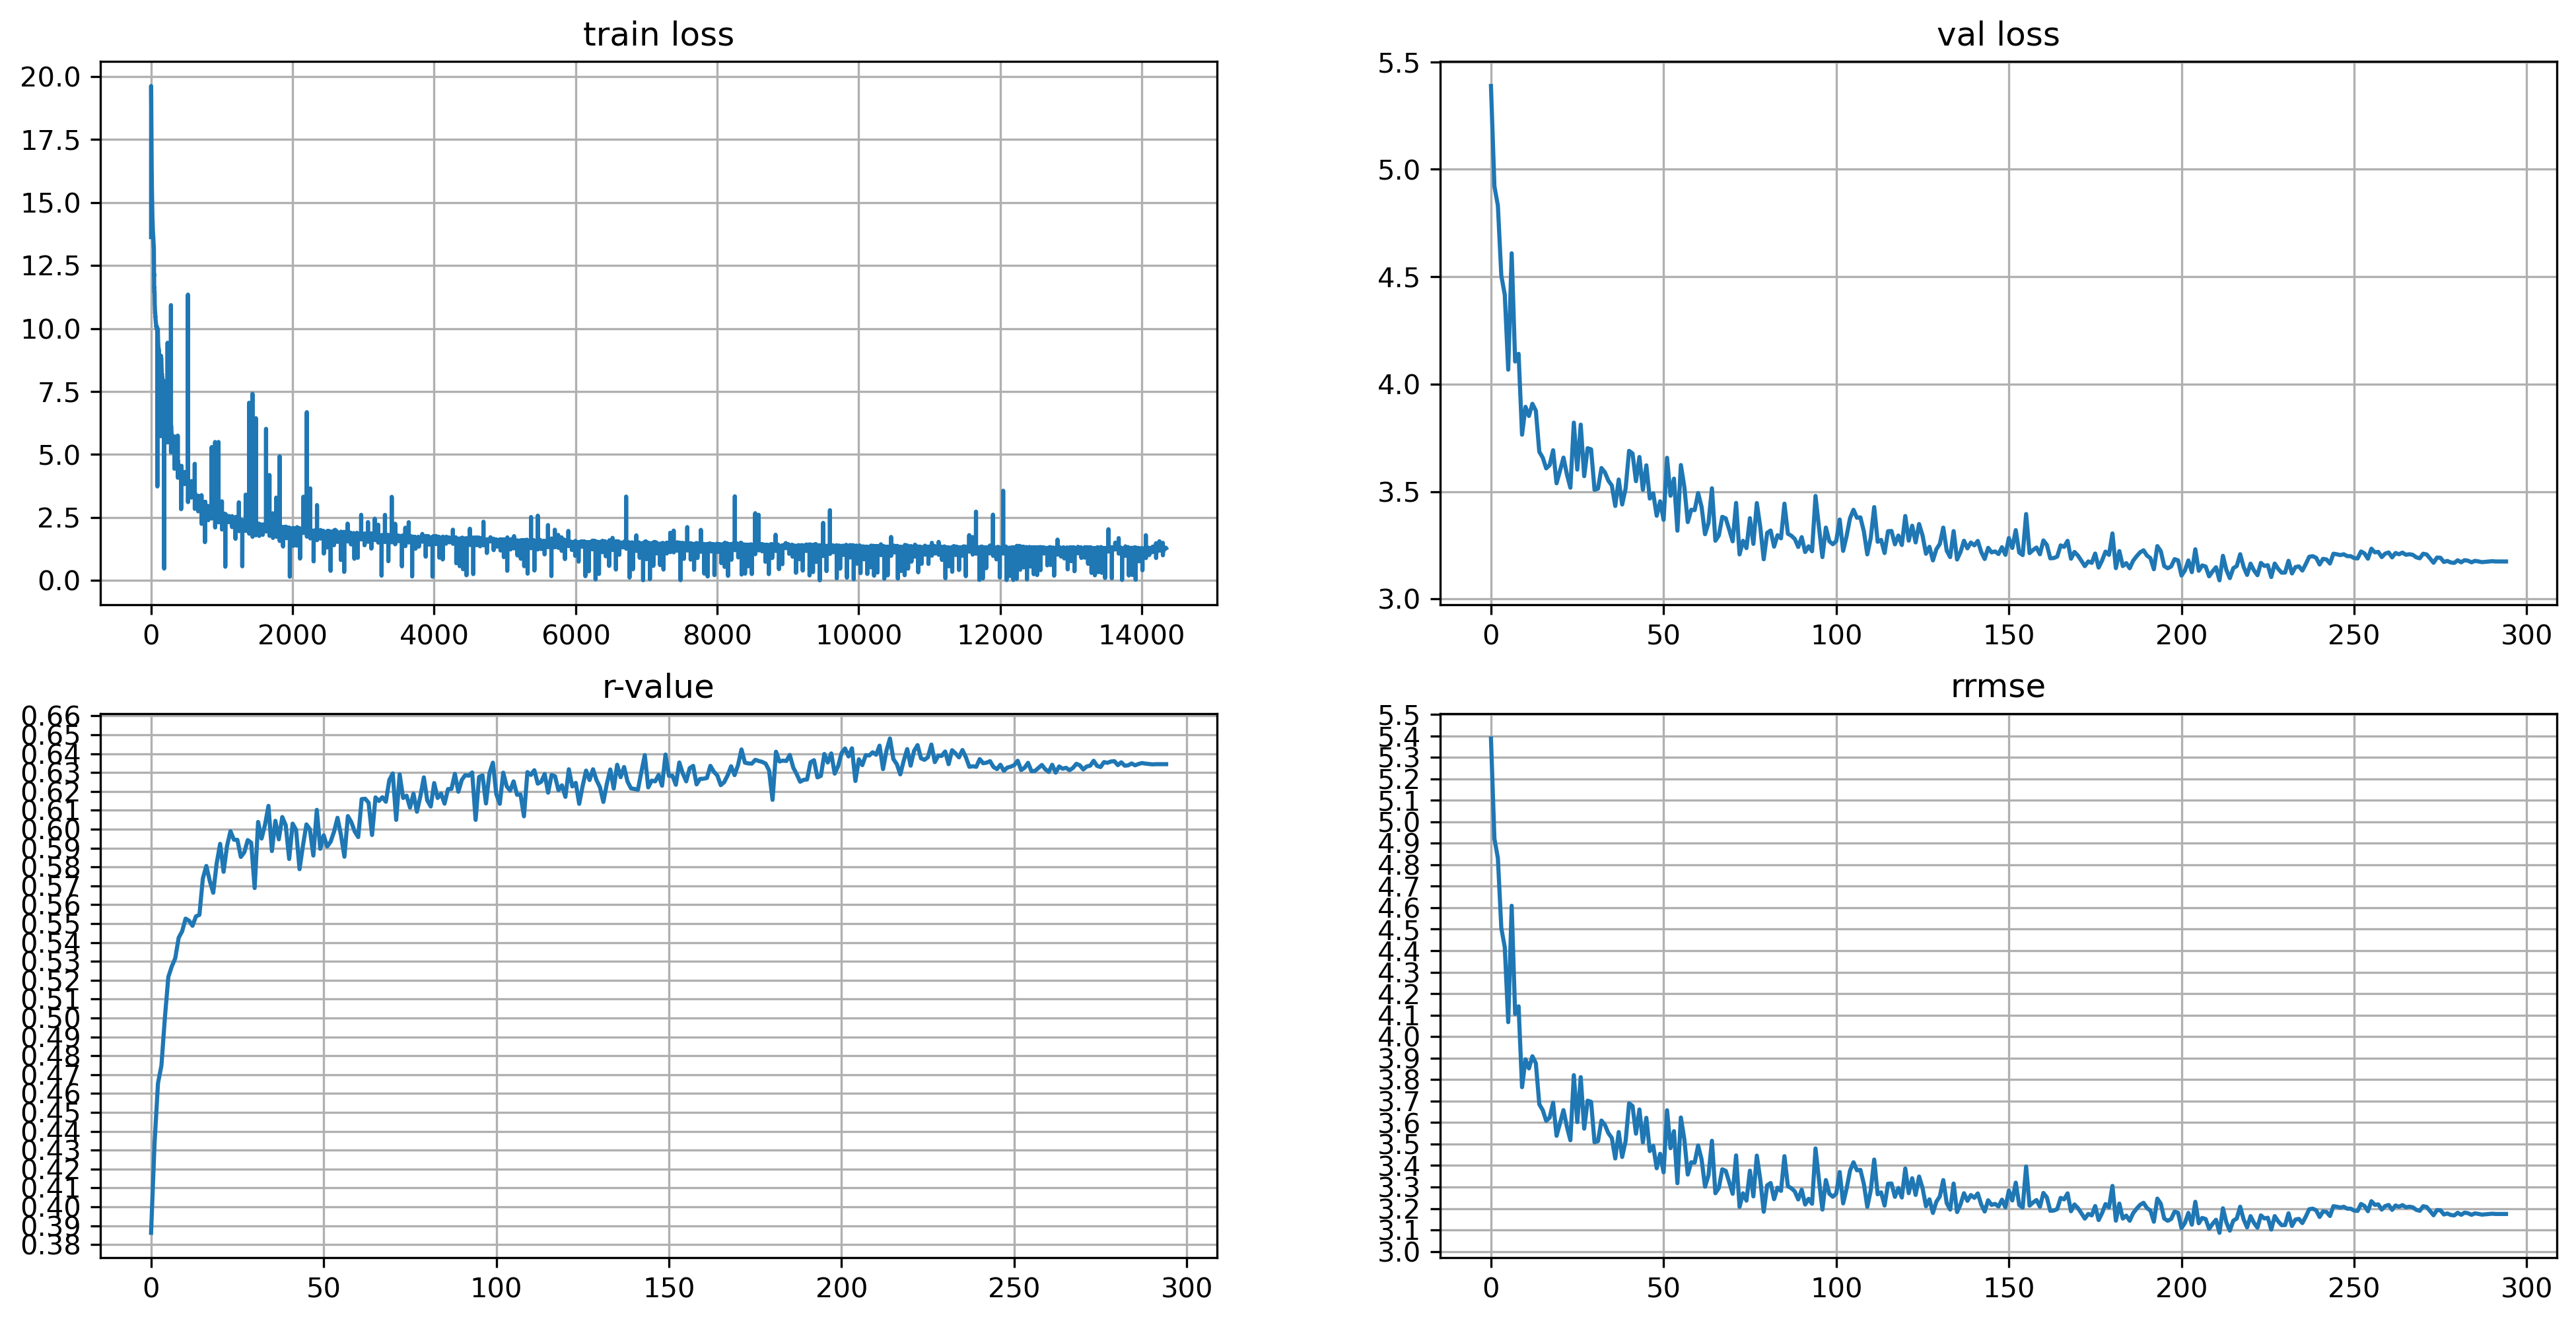

In [109]:
log_file = '../new_model_21.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

55762
dataset =  hard02
at epoch 54, valloss = 3.1609, rvalue = 0.6373, rrmse = 3.1609


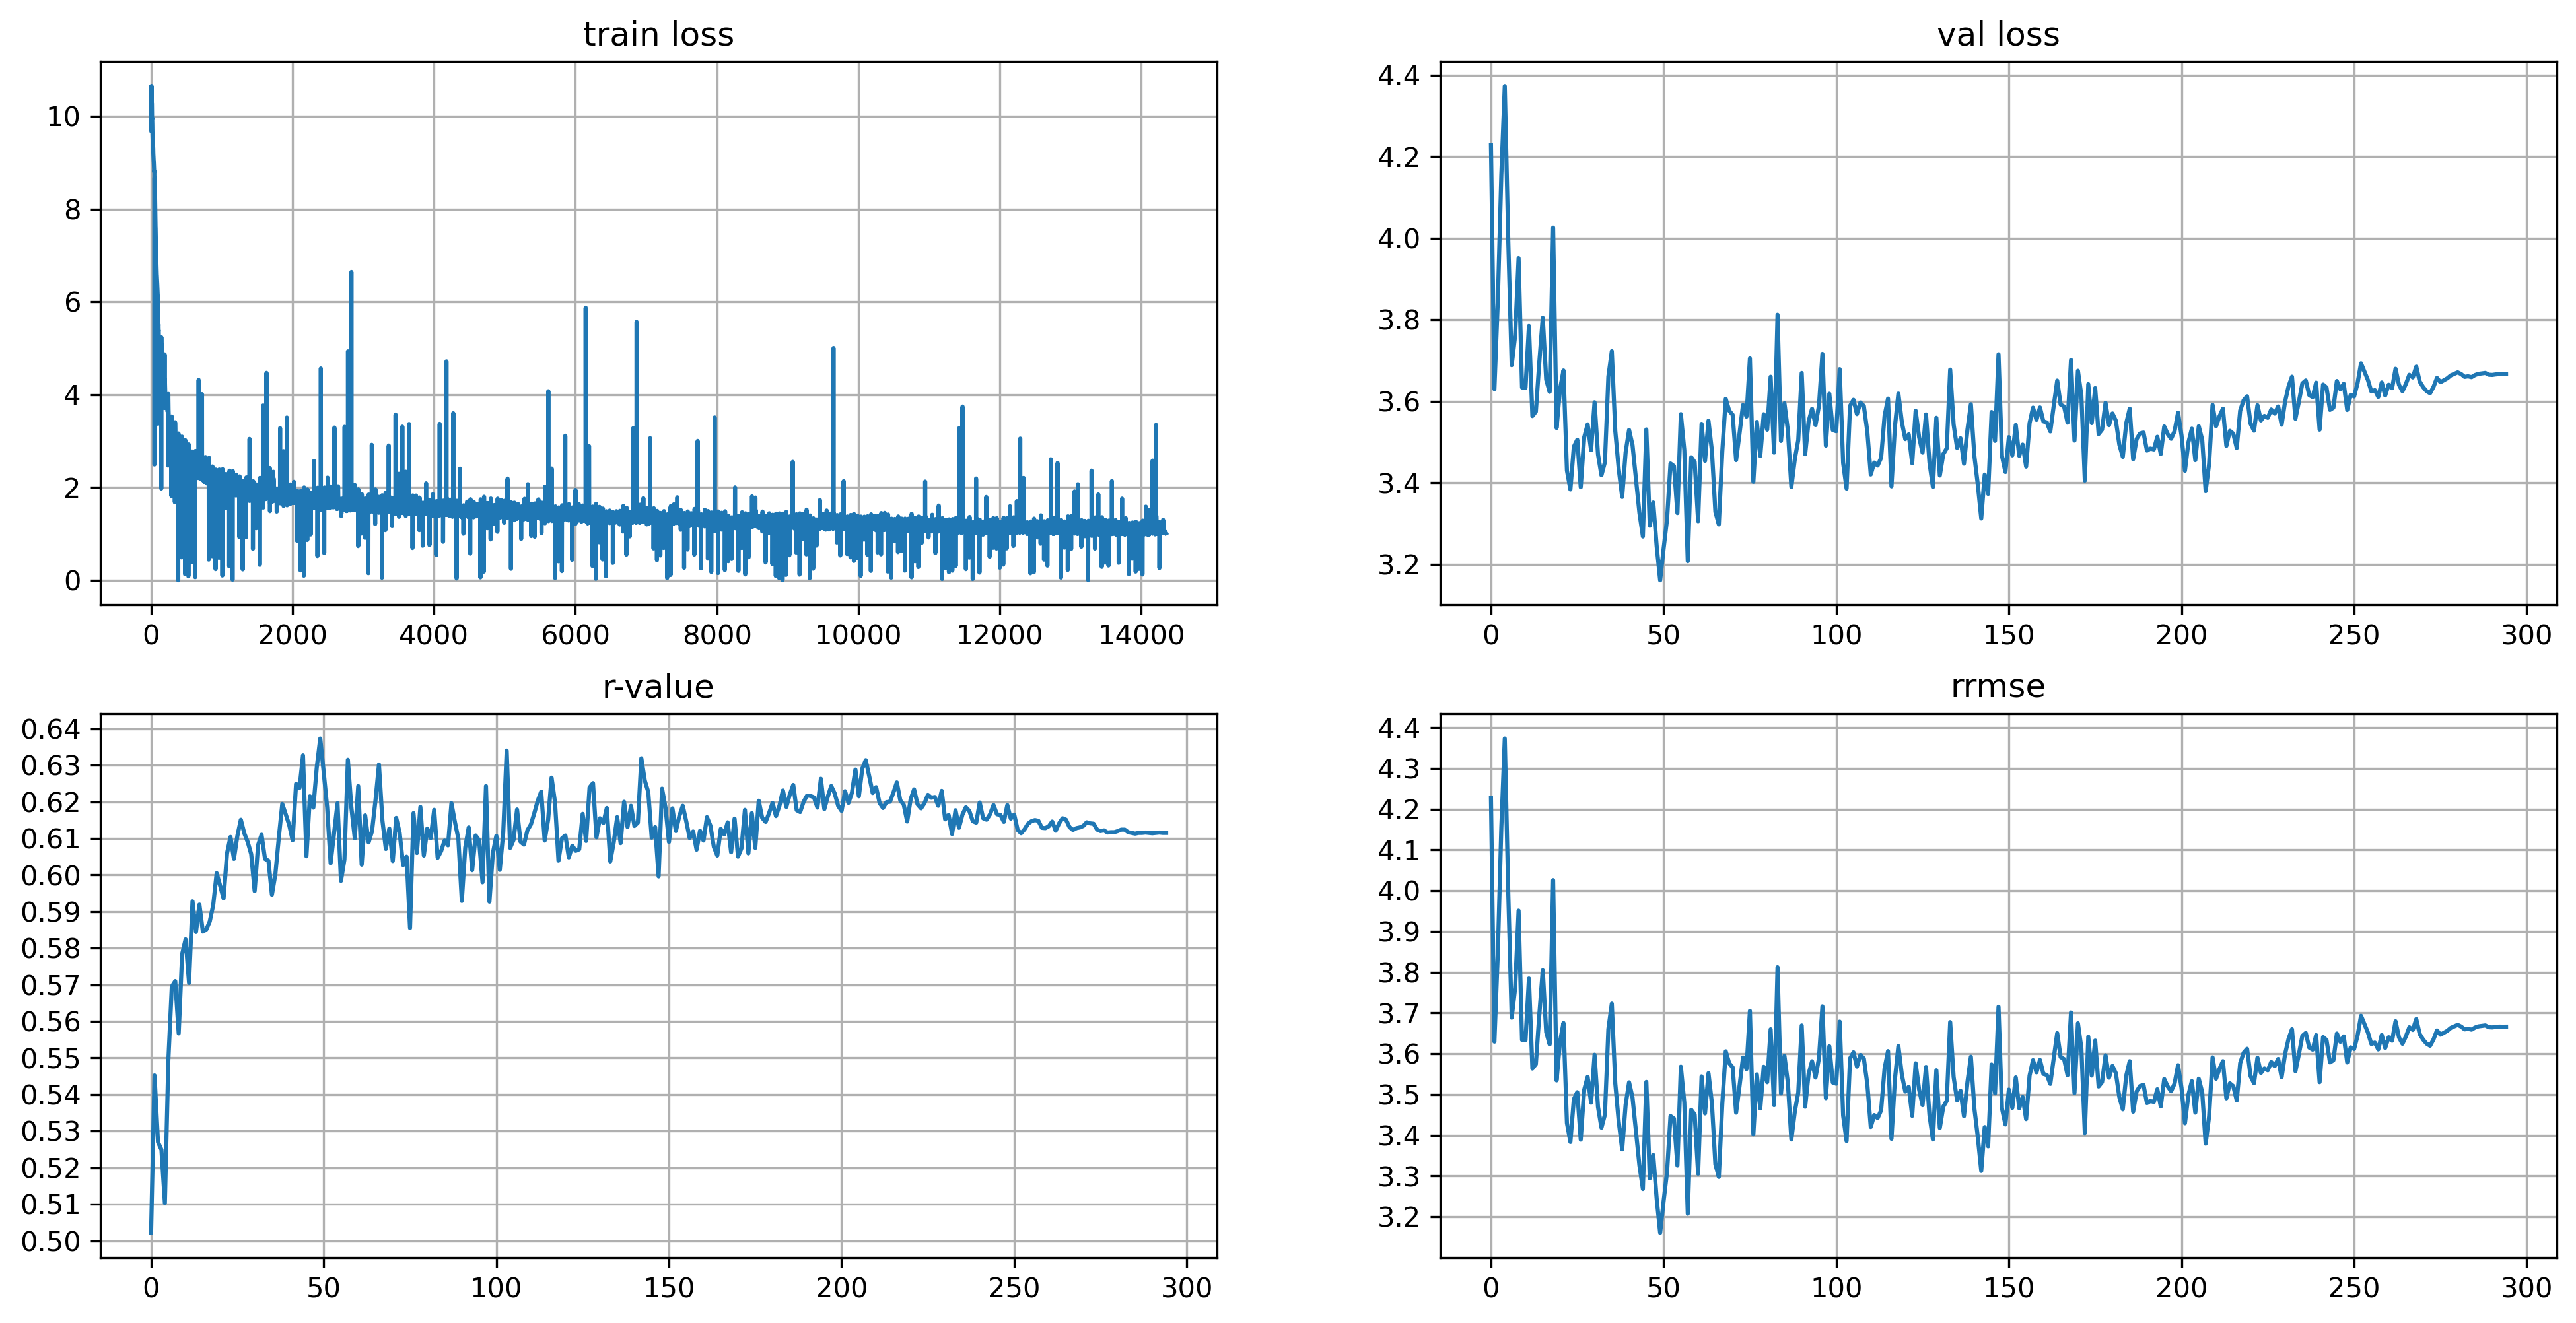

In [112]:
log_file = '../new_model_22.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

75115
dataset =  hard02
at epoch 153, valloss = 3.1482, rvalue = 0.6368, rrmse = 3.1482


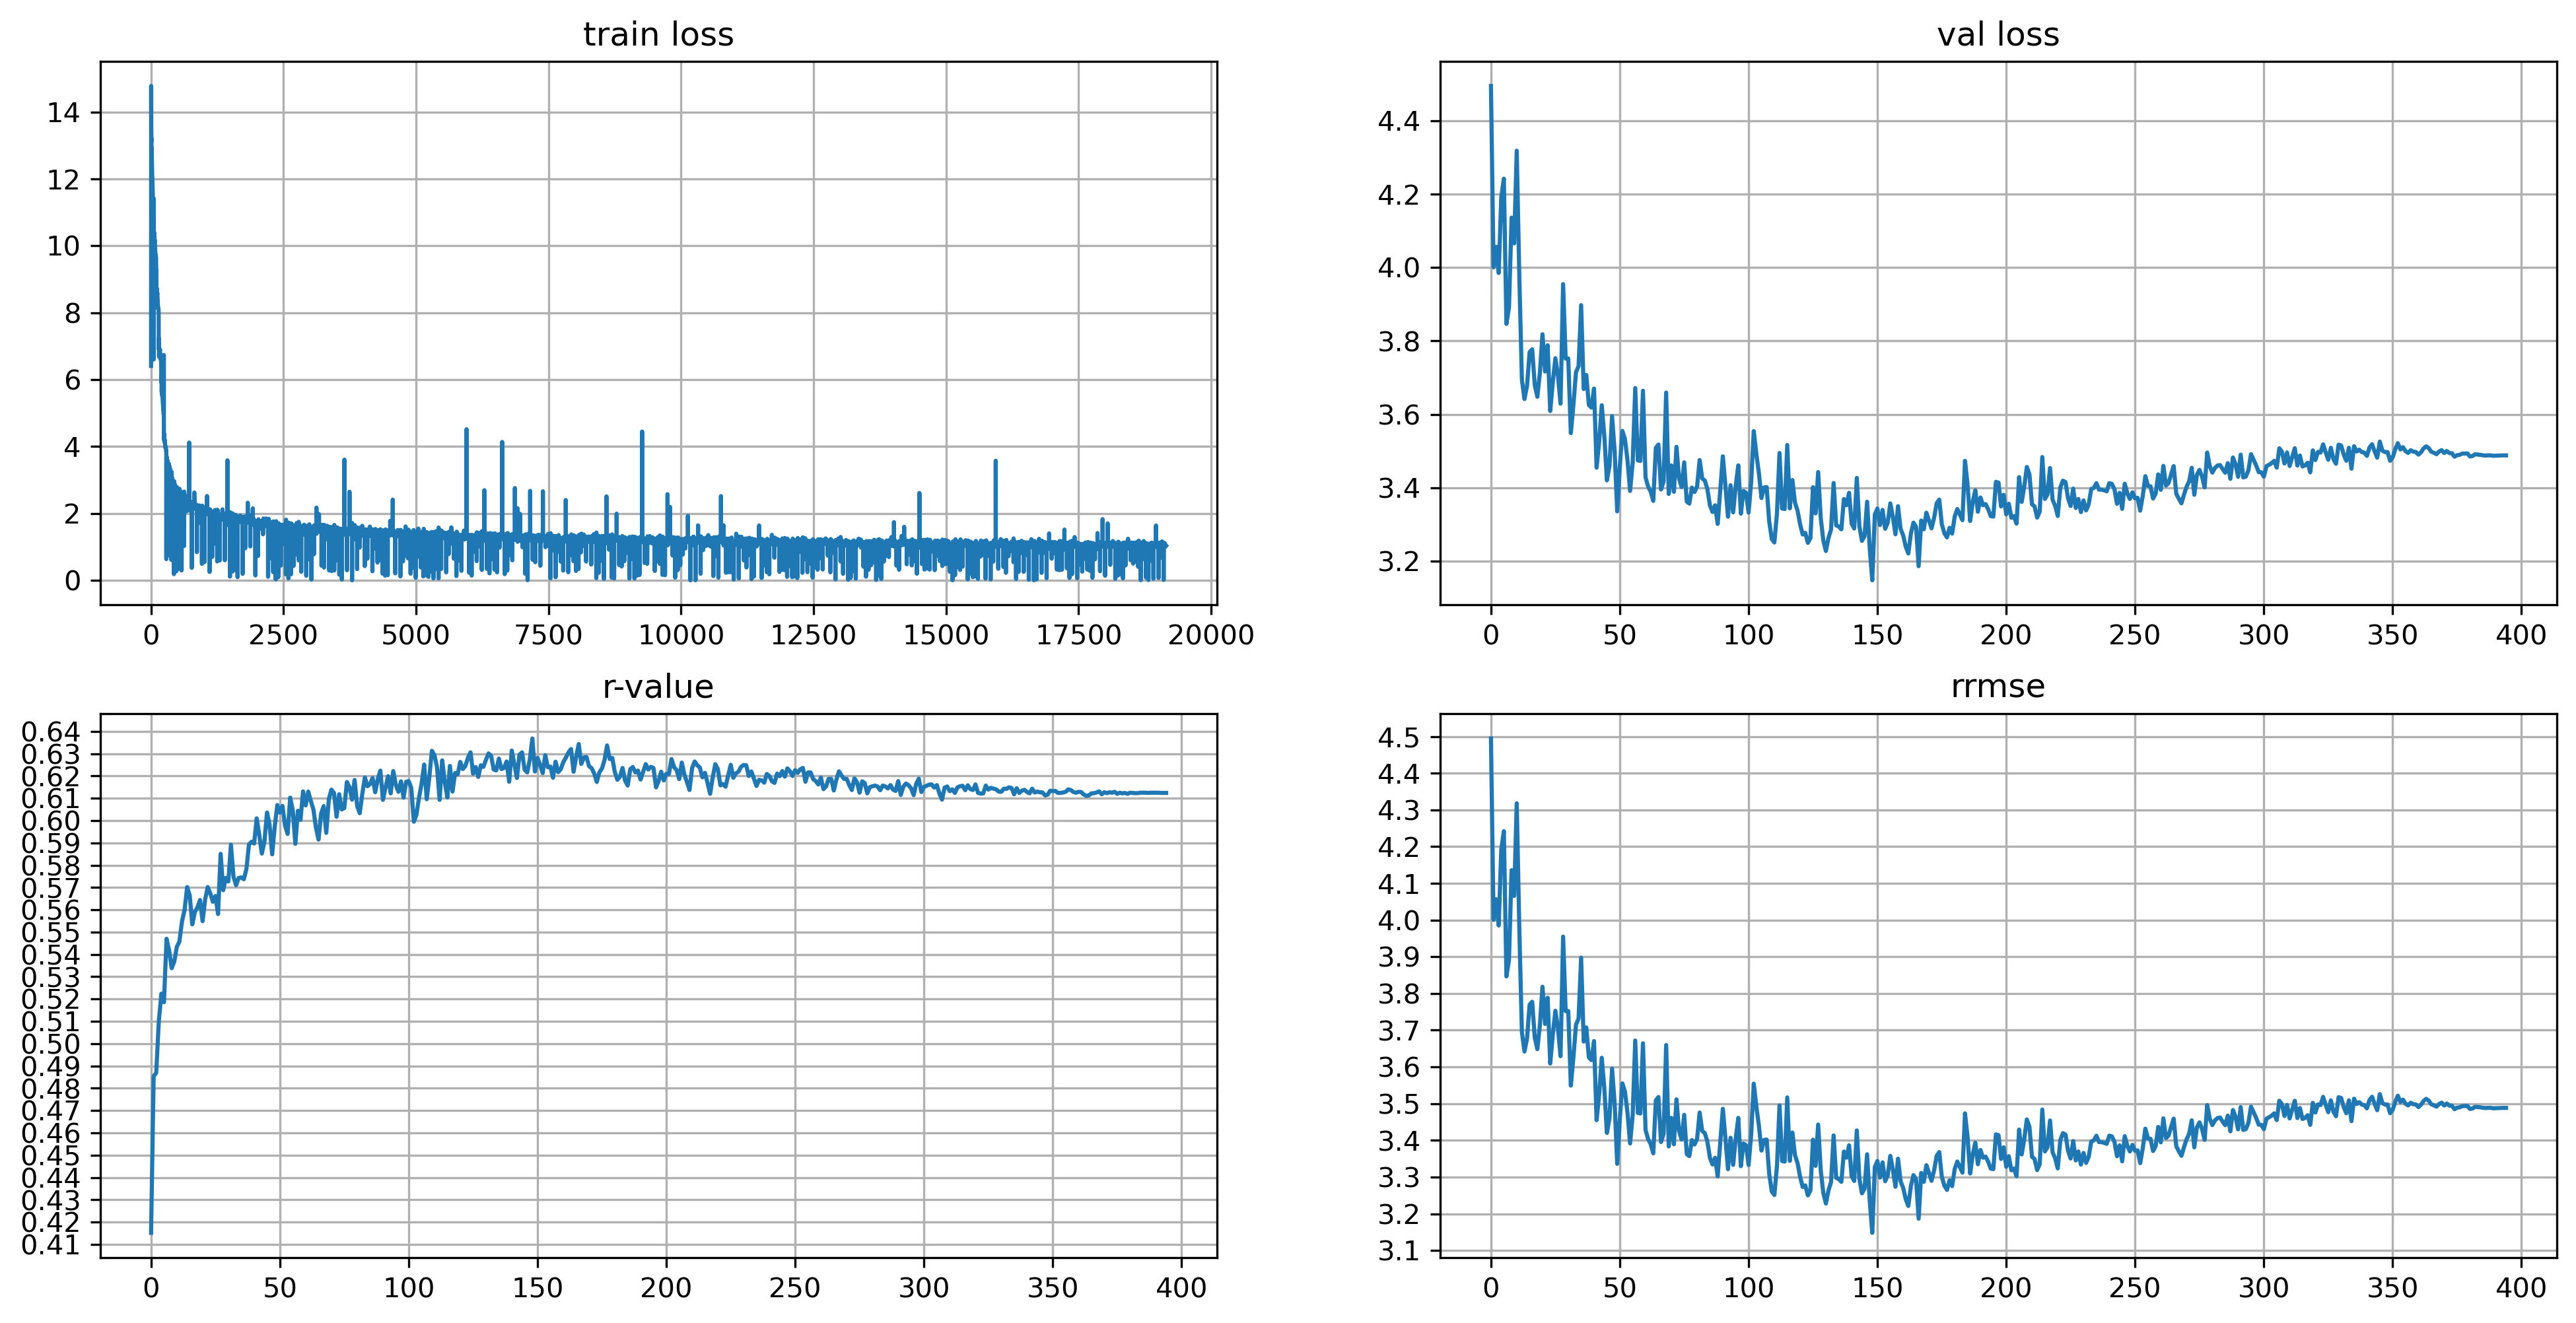

In [114]:
log_file = '../new_model_23.log'
threshold = 20.
losses, rvalues, rrmses, tlosses = get_res(log_file)

idx = rvalues.argmax()
print('at epoch {}, valloss = {}, rvalue = {}, rrmse = {}'.format(
    idx, losses[idx], rvalues[idx], rrmses[idx]
))

warm_up = 5
indices = np.where(tlosses < threshold)[0]

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=300)
axs[0, 0].plot(tlosses[indices])
axs[0, 0].grid()
axs[0, 0].set_title('train loss')

axs[0, 1].plot(losses[warm_up:])
axs[0, 1].grid()
axs[0, 1].set_title('val loss')
# axs[0, 1].yaxis.set_major_locator(MultipleLocator(0.02)) 

axs[1, 0].plot(rvalues[warm_up:])
axs[1, 0].grid()
axs[1, 0].set_title('r-value')
axs[1, 0].yaxis.set_major_locator(MultipleLocator(0.01))

axs[1, 1].plot(rrmses[warm_up:])
axs[1, 1].grid()
axs[1, 1].set_title('rrmse')
axs[1, 1].yaxis.set_major_locator(MultipleLocator(0.1))

In [43]:
fp = '../output/new_model_06/prediction/validation_metrics.npz'
f = np.load(fp, allow_pickle=True)

metrics = f['metrics'].item()
output = metrics['output']
preds = output['preds']
labels = output['labels']

In [82]:
cnt = 0
res = []
ys = []
for i, xx in enumerate(zip(preds, labels)):
    p, y = xx
    if np.abs(p - y) > 2.0:
        print(i, p, y)
        res.append((i,p,y))
        ys.append(y)
        cnt += 1

5 -9.134335 -7.11
6 -8.742076 -11.34
9 -9.490959 -4.45
13 -9.997977 -14.05
14 -10.732491 -13.85
15 -10.397219 -13.64
23 -8.732296 -10.9
50 -10.395122 -7.77
51 -10.07166 -7.370000000000001
74 -6.516635 -3.795
95 -8.018834 -10.563333333333334
96 -8.026015 -10.563333333333334
97 -8.0063505 -10.563333333333334
98 -7.9979424 -10.563333333333334
99 -8.009379 -10.156666666666666
100 -8.145102 -10.563333333333334
101 -8.051065 -10.563333333333334
103 -8.127873 -10.563333333333334
104 -8.008218 -10.563333333333334
105 -8.008095 -10.563333333333334
106 -8.00409 -10.563333333333334
110 -8.021204 -10.563333333333334
111 -7.9989038 -10.563333333333334
113 -10.292033 -8.16
114 -10.287217 -8.16
116 -10.296942 -8.16
117 -10.288225 -8.16
128 -10.315455 -8.16
135 -9.951018 -7.095000000000001
136 -10.551193 -7.87
161 -11.108496 -7.84
165 -10.045015 -8.04
168 -9.9332 -7.54
177 -9.560977 -6.33
178 -9.627654 -6.46
180 -9.711181 -7.39
182 -9.485811 -5.95
192 -6.9903827 -9.32
199 -7.6673756 -10.76
223 -8.3328

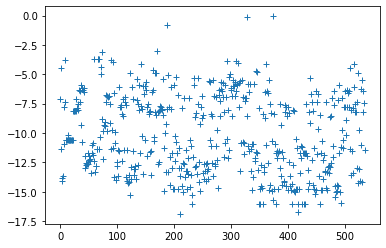

In [85]:
ys = np.array(ys)
plt.plot(ys, '+')
plt.show()

In [53]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)

data_dir = '../dataset/tmp_data/hard02/val/'
data_file = 'test.csv'
data_file = os.path.join(data_dir, data_file)

madf = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(madf))
madf.head(3)

2197


index  exp_id  key_complex  dataset_id UniProt  \
0      1       1            1  pnat_13395  P27694   
1      2       2            2  pnat_13396  P27694   
2      5       5            5  pnat_14763  A3FMN7   

                                    protein_sequence  \
0  MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...   
1  MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...   
2  MNYNPEEQFRCTIIRGKAKNMLDNLLPAYANIIDDICPCDKASFVK...   

                                 nucleotide_sequence nucleic_acid_mutation  \
0         CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT                  NONE   
1  CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...                  NONE   
2                                       GGTACCCGTGGA                  NONE   

  protein_mutation nucleic_acid_type nucleic_acid_type_new        Kd     dG  \
0             WILD               DNA                 ssDNA  1.83e-06  -7.83   
1             WILD               DNA                 ssDNA  1.39e-06  -7.99   
2             WILD               DNA                 ssDNA   7.3e-09 -11.10   

    pH     Tm        Method      pmid data_source  \
0  7.8  298.0  Fluorescence  18729380        pnat   
1  7.8  298.0  Fluorescence  18729380        pnat   
2  6.5  298.0     Gel shift  18433771        pnat   

                                     protein_na_pair  multiple_dg  max_min  \
0  MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...            1      0.0   
1  MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...            1      0.0   
2  MNYNPEEQFRCTIIRGKAKNMLDNLLPAYANIIDDICPCDKASFVK...            1      0.0   

  max_min_judge  dG_ori pdb_id len_p1     len_p2 protein_chain na_chain  \
0          good   -7.83   1jmc  A:238        B:8           A_1      B_1   
1          good   -7.99   1jmc  A:238        B:8           A_1      B_1   
2          good  -11.10   2vla  A:280  L:12,M:12           A_1  L_1.M_1   

  identity_protein_seq identity_na_seq UniProt_type  protein_sequence_len  \
0                 0.39            0.12   Swiss-Prot                   616   
1                 0.39            0.12   Swiss-Prot                   616   
2                 0.61            0.33       TrEMBL                   462   

  wt_af2_file_download          mo_pdb_chain  \
0                  yes  1fgu_A,1l1o_C,2b29_A   
1                  yes  1fgu_A,1l1o_C,2b29_A   
2                  yes                5hnf_A   

                                            bs_score nucleotide_sequence_one  \
0  0.4446617647058823,0.3088235294117647,0.214705...                    NONE   
1  0.4446617647058823,0.3088235294117647,0.214705...                    NONE   
2                                   0.99644128113879                    NONE   

  nucleotide_sequence_two nucleotide_sequence_two_reverse align_score  \
0                    NONE                            NONE        NONE   
1                    NONE                            NONE        NONE   
2                    NONE                            NONE        NONE   

  len_nucleotide_sequence_one len_nucleotide_sequence_two  \
0                        NONE                        NONE   
1                        NONE                        NONE   
2                        NONE                        NONE   

  coverage_nucleotide_sequence_one coverage_nucleotide_sequence_two  \
0                             NONE                             NONE   
1                             NONE                             NONE   
2                             NONE                             NONE   

  coverage_mean_nucleotide_sequence protein_index cluster_protein_50_index  \
0                              NONE    protein_12               Cluster_30   
1                              NONE    protein_12               Cluster_30   
2                              NONE    protein_14               Cluster_42   

   cluster_protein_50_number  \
0                         22   
1                         22   
2                          5   

                    

In [72]:
len(set(madf['UniProt'])), len(set(madf['key_nucleic_acids']))

(383, 1134)

In [81]:
mask = madf['UniProt'] == 'Q5AP80'
indexs = madf['index'][mask]
print( complex_type[indexs] )
print( preds[indexs] )
print( labels[indexs] )

['wt' 'wt' 'wt' 'wt' 'wt' 'wt' 'mut' 'mut' 'mut' 'mut']
[ -6.3502107  -8.706303   -8.86829    -8.8240185 -11.410867  -10.739806
  -9.451306   -9.4270525 -10.456885   -9.223347 ]
[ -6.12   -6.95   -8.22  -10.87  -14.015 -11.245 -12.455 -12.78  -13.68
  -8.04 ]


In [78]:
uniprots = set()
nc_keys = set()
base_class = madf['base_class'].values
key_complex = madf['key_complex'].values
complex_type = madf['complex_type'].values
for i, p, y in res:
    print(key_complex[i], complex_type[i], base_class[i], madf['UniProt'].values[i], p, y)
    uniprots.add( madf['UniProt'].values[i] )
    nc_keys.add( madf['key_nucleic_acids'].values[i] )

22 wt SDNACluster_291-PCluster_462 Q8W4L5 -9.134335 -7.11
24 wt SDNACluster_1206-PCluster_464 P27540 -8.742076 -11.34
55 wt SDNACluster_956-PCluster_482 P10026 -9.490959 -4.45
76 wt SDNACluster_206-PCluster_498 P20585 -9.997977 -14.05
82 wt SDNACluster_659-PCluster_504 P29539 -10.732491 -13.85
85 mut SDNACluster_890-PCluster_551 O45189 -10.397219 -13.64
93 mut SDNACluster_890-PCluster_551 O45189 -8.732296 -10.9
220 wt SDNACluster_339-PCluster_524 O87365 -10.395122 -7.77
225 wt SDNACluster_1302-PCluster_528 Q3ZD73 -10.07166 -7.370000000000001
318 mut SDNACluster_1350-PCluster_371 P0AEE8 -6.516635 -3.795
425 mut SDNACluster_988-PCluster_457 Q9UBZ9 -8.018834 -10.563333333333334
428 mut SDNACluster_988-PCluster_457 Q9UBZ9 -8.026015 -10.563333333333334
431 mut SDNACluster_988-PCluster_457 Q9UBZ9 -8.0063505 -10.563333333333334
434 mut SDNACluster_988-PCluster_457 Q9UBZ9 -7.9979424 -10.563333333333334
437 mut SDNACluster_988-PCluster_457 Q9UBZ9 -8.009379 -10.156666666666666
440 mut SDNACluste

In [68]:
len(uniprots), uniprots

(206,
 {'A5TY69',
  'A6T8N1',
  'E1A0Z5',
  'G0YYQ5',
  'H2L051',
  'O13988',
  'O15516',
  'O15527',
  'O25386',
  'O34857',
  'O43189',
  'O45189',
  'O50123',
  'O59282',
  'O60059',
  'O60563',
  'O66551',
  'O66858',
  'O67800',
  'O75362',
  'O87365',
  'O94916',
  'O95243',
  'O95319',
  'P00573',
  'P00642',
  'P00734',
  'P00962',
  'P03001',
  'P03023',
  'P03034',
  'P03045',
  'P03069',
  'P03252',
  'P03332',
  'P03372',
  'P03416',
  'P03496',
  'P03615',
  'P03630',
  'P03695',
  'P03882',
  'P04015',
  'P04150',
  'P04390',
  'P04993',
  'P05102',
  'P05523',
  'P05719',
  'P05725',
  'P06401',
  'P06555',
  'P07013',
  'P08046',
  'P08235',
  'P0A6R3',
  'P0A6X3',
  'P0A7C2',
  'P0A881',
  'P0A8S1',
  'P0AA16',
  'P0ACJ8',
  'P0ACP7',
  'P0AE72',
  'P0AEE8',
  'P0AF28',
  'P0AGE0',
  'P0CL77',
  'P0DMV8',
  'P0DOY6',
  'P10026',
  'P10925',
  'P12956',
  'P14081',
  'P14565',
  'P14921',
  'P15840',
  'P16117',
  'P16236',
  'P16525',
  'P17429',
  'P17433',
  'P17888'

In [71]:
len(nc_keys), nc_keys

(379,
 {'Double_DNA_1650',
  'Double_DNA_1657',
  'Double_DNA_1659',
  'Double_DNA_1663',
  'Double_DNA_1667',
  'Double_DNA_1668',
  'Double_DNA_1671',
  'Double_DNA_1674',
  'Double_DNA_1678',
  'Double_DNA_1679',
  'Double_DNA_1680',
  'Double_DNA_1684',
  'Double_DNA_1689',
  'Double_DNA_1725',
  'Double_DNA_1743',
  'Double_DNA_1748',
  'Double_DNA_1751',
  'Double_DNA_1755',
  'Double_DNA_1757',
  'Double_DNA_1766',
  'Double_DNA_1781',
  'Double_DNA_1783',
  'Double_DNA_1791',
  'Double_DNA_1797',
  'Double_DNA_1809',
  'Double_DNA_1817',
  'Double_DNA_1821',
  'Double_DNA_1828',
  'Double_DNA_1832',
  'Double_DNA_1860',
  'Double_DNA_1861',
  'Double_DNA_1864',
  'Double_DNA_1867',
  'Double_DNA_1869',
  'Double_DNA_1887',
  'Double_DNA_1889',
  'Double_DNA_1896',
  'Double_DNA_1906',
  'Double_DNA_1907',
  'Double_DNA_1910',
  'Double_DNA_1935',
  'Double_DNA_1938',
  'Double_DNA_1959',
  'Double_DNA_1995',
  'Double_DNA_2001',
  'Double_DNA_2004',
  'Double_DNA_2017',
  'Doub

In [86]:
n = int(4770400 / 5000.)
np.power(0.993, n)

0.0012290882435662977